In [10]:
pip install networkx matplotlib

In [11]:
import networkx as nx
import random


In [12]:
# Parameters
NUM_DRONES = 10
AREA_SIZE = 1000
COMM_RANGE = 200
SIM_TIME = 100

# Initialize the network
G = nx.Graph()

In [13]:
# Add nodes (drones) with random positions
for i in range(NUM_DRONES):
    x = random.uniform(0, AREA_SIZE)
    y = random.uniform(0, AREA_SIZE)
    G.add_node(i, pos=(x, y))

In [14]:
# Function to update positions
def update_positions(G):
    for node in G.nodes:
        x, y = G.nodes[node]['pos']
        x += random.uniform(-10, 10)
        y += random.uniform(-10, 10)
        x = max(0, min(x, AREA_SIZE))
        y = max(0, min(y, AREA_SIZE))
        G.nodes[node]['pos'] = (x, y)


In [15]:
# Function to update edges based on communication range
def update_edges(G):
    G.clear_edges()
    nodes = list(G.nodes)
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            pos_i = G.nodes[nodes[i]]['pos']
            pos_j = G.nodes[nodes[j]]['pos']
            distance = ((pos_i[0] - pos_j[0])**2 + (pos_i[1] - pos_j[1])**2)**0.5
            if distance <= COMM_RANGE:
                G.add_edge(nodes[i], nodes[j])

In [16]:
# AODV Route Discovery
def aodv_route_discovery(G, source, destination):
    # Route Request (RREQ) broadcast
    visited = set()
    queue = [(source, [source])]

    while queue:
        current_node, path = queue.pop(0)
        if current_node == destination:
            return path
        if current_node not in visited:
            visited.add(current_node)
            for neighbor in G.neighbors(current_node):
                queue.append((neighbor, path + [neighbor]))
    return None

In [17]:
# Simulation loop
for t in range(SIM_TIME):
    update_positions(G)
    update_edges(G)

    # Example: Find a route from node 0 to node 9
    source = 0
    destination = 9
    route = aodv_route_discovery(G, source, destination)
    if route:
        print(f"Time {t}: Route from {source} to {destination}: {route}")
    else:
        print(f"Time {t}: No route found from {source} to {destination}")

Time 0: Route from 0 to 9: [0, 9]
Time 1: Route from 0 to 9: [0, 9]
Time 2: Route from 0 to 9: [0, 9]
Time 3: Route from 0 to 9: [0, 9]
Time 4: Route from 0 to 9: [0, 9]
Time 5: Route from 0 to 9: [0, 9]
Time 6: Route from 0 to 9: [0, 9]
Time 7: Route from 0 to 9: [0, 9]
Time 8: Route from 0 to 9: [0, 9]
Time 9: Route from 0 to 9: [0, 9]
Time 10: Route from 0 to 9: [0, 9]
Time 11: Route from 0 to 9: [0, 9]
Time 12: Route from 0 to 9: [0, 9]
Time 13: Route from 0 to 9: [0, 9]
Time 14: Route from 0 to 9: [0, 9]
Time 15: Route from 0 to 9: [0, 9]
Time 16: Route from 0 to 9: [0, 9]
Time 17: Route from 0 to 9: [0, 9]
Time 18: Route from 0 to 9: [0, 9]
Time 19: Route from 0 to 9: [0, 9]
Time 20: Route from 0 to 9: [0, 9]
Time 21: Route from 0 to 9: [0, 9]
Time 22: Route from 0 to 9: [0, 9]
Time 23: Route from 0 to 9: [0, 9]
Time 24: Route from 0 to 9: [0, 9]
Time 25: Route from 0 to 9: [0, 9]
Time 26: Route from 0 to 9: [0, 9]
Time 27: Route from 0 to 9: [0, 9]
Time 28: Route from 0 to 9: [0

In [18]:
import math

# Function to calculate Euclidean distance
def distance(pos1, pos2):
    return math.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)

# Greedy Forwarding
def greedy_forwarding(G, source, destination):
    current_node = source
    path = [current_node]

    while current_node != destination:
        neighbors = list(G.neighbors(current_node))
        if not neighbors:
            return None  # No path

        # Choose the neighbor closest to the destination
        dest_pos = G.nodes[destination]['pos']
        next_node = min(neighbors, key=lambda n: distance(G.nodes[n]['pos'], dest_pos))

        if next_node in path:
            return None  # Loop detected

        path.append(next_node)
        current_node = next_node

    return path

# Simulation loop
for t in range(SIM_TIME):
    update_positions(G)
    update_edges(G)

    # Example: Find a route using GPSR
    source = 0
    destination = 9
    route = greedy_forwarding(G, source, destination)
    if route:
        print(f"Time {t}: GPSR Route from {source} to {destination}: {route}")
    else:
        print(f"Time {t}: No GPSR route found from {source} to {destination}")

Time 0: GPSR Route from 0 to 9: [0, 9]
Time 1: GPSR Route from 0 to 9: [0, 9]
Time 2: GPSR Route from 0 to 9: [0, 9]
Time 3: GPSR Route from 0 to 9: [0, 9]
Time 4: GPSR Route from 0 to 9: [0, 9]
Time 5: GPSR Route from 0 to 9: [0, 9]
Time 6: GPSR Route from 0 to 9: [0, 9]
Time 7: GPSR Route from 0 to 9: [0, 9]
Time 8: GPSR Route from 0 to 9: [0, 9]
Time 9: GPSR Route from 0 to 9: [0, 9]
Time 10: GPSR Route from 0 to 9: [0, 9]
Time 11: GPSR Route from 0 to 9: [0, 9]
Time 12: GPSR Route from 0 to 9: [0, 9]
Time 13: GPSR Route from 0 to 9: [0, 9]
Time 14: GPSR Route from 0 to 9: [0, 9]
Time 15: GPSR Route from 0 to 9: [0, 9]
Time 16: GPSR Route from 0 to 9: [0, 9]
Time 17: GPSR Route from 0 to 9: [0, 9]
Time 18: GPSR Route from 0 to 9: [0, 9]
Time 19: GPSR Route from 0 to 9: [0, 9]
Time 20: GPSR Route from 0 to 9: [0, 9]
Time 21: GPSR Route from 0 to 9: [0, 9]
Time 22: GPSR Route from 0 to 9: [0, 9]
Time 23: GPSR Route from 0 to 9: [0, 9]
Time 24: GPSR Route from 0 to 9: [0, 9]
Time 25: G

In [19]:
# Add energy attribute to nodes
for node in G.nodes:
    G.nodes[node]['energy'] = 100  # Initial energy level

# Function to update energy (simulate energy consumption)
def update_energy(G):
    for node in G.nodes:
        G.nodes[node]['energy'] -= random.uniform(0.1, 1.0)  # Random energy consumption

# Energy-aware route discovery
def energy_aware_route_discovery(G, source, destination):
    visited = set()
    queue = [(source, [source], G.nodes[source]['energy'])]

    while queue:
        current_node, path, energy = queue.pop(0)
        if current_node == destination:
            return path
        if current_node not in visited:
            visited.add(current_node)
            for neighbor in G.neighbors(current_node):
                neighbor_energy = G.nodes[neighbor]['energy']
                if neighbor_energy > 20:  # Only consider nodes with sufficient energy
                    queue.append((neighbor, path + [neighbor], neighbor_energy))
    return None

# Simulation loop
for t in range(SIM_TIME):
    update_positions(G)
    update_edges(G)
    update_energy(G)

    # Example: Find an energy-aware route
    source = 0
    destination = 9
    route = energy_aware_route_discovery(G, source, destination)
    if route:
        print(f"Time {t}: Energy-aware route from {source} to {destination}: {route}")
    else:
        print(f"Time {t}: No energy-aware route found from {source} to {destination}")

Time 0: Energy-aware route from 0 to 9: [0, 9]
Time 1: Energy-aware route from 0 to 9: [0, 9]
Time 2: Energy-aware route from 0 to 9: [0, 9]
Time 3: Energy-aware route from 0 to 9: [0, 9]
Time 4: Energy-aware route from 0 to 9: [0, 9]
Time 5: Energy-aware route from 0 to 9: [0, 9]
Time 6: Energy-aware route from 0 to 9: [0, 9]
Time 7: Energy-aware route from 0 to 9: [0, 9]
Time 8: Energy-aware route from 0 to 9: [0, 9]
Time 9: Energy-aware route from 0 to 9: [0, 9]
Time 10: Energy-aware route from 0 to 9: [0, 9]
Time 11: Energy-aware route from 0 to 9: [0, 9]
Time 12: Energy-aware route from 0 to 9: [0, 9]
Time 13: Energy-aware route from 0 to 9: [0, 9]
Time 14: Energy-aware route from 0 to 9: [0, 9]
Time 15: Energy-aware route from 0 to 9: [0, 9]
Time 16: Energy-aware route from 0 to 9: [0, 9]
Time 17: Energy-aware route from 0 to 9: [0, 9]
Time 18: Energy-aware route from 0 to 9: [0, 9]
Time 19: Energy-aware route from 0 to 9: [0, 9]
Time 20: Energy-aware route from 0 to 9: [0, 9]
Ti

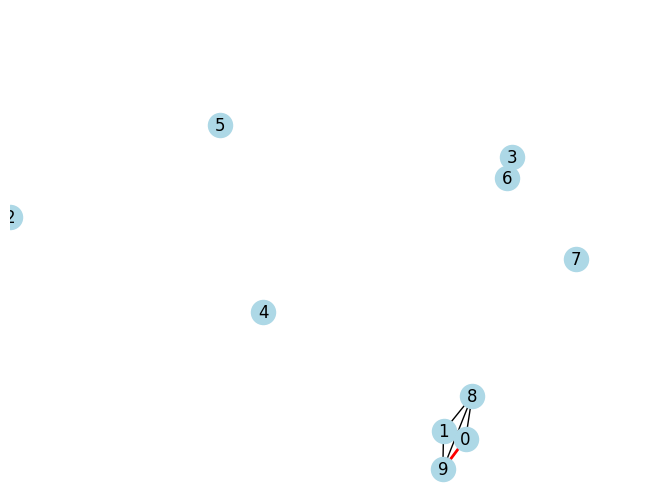

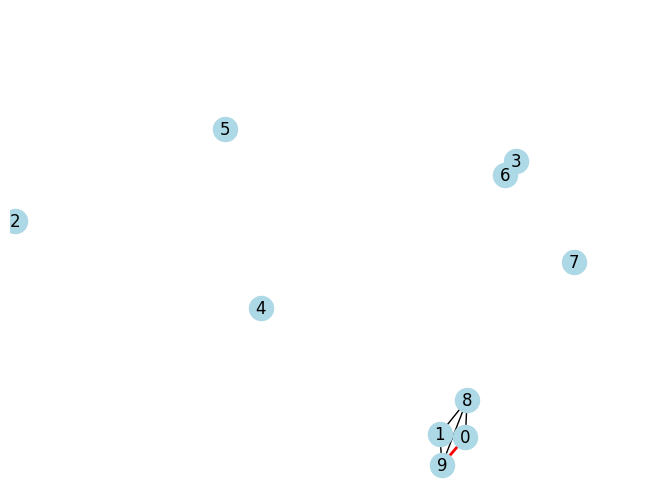

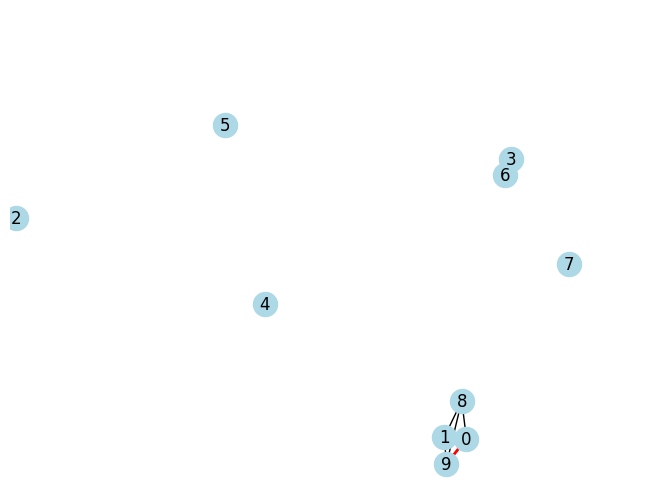

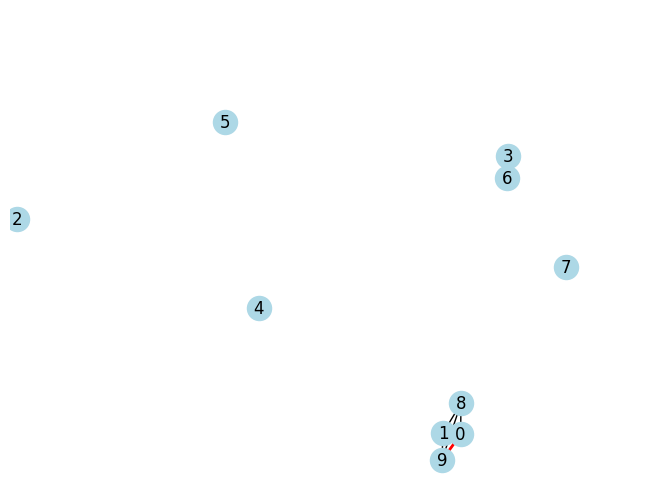

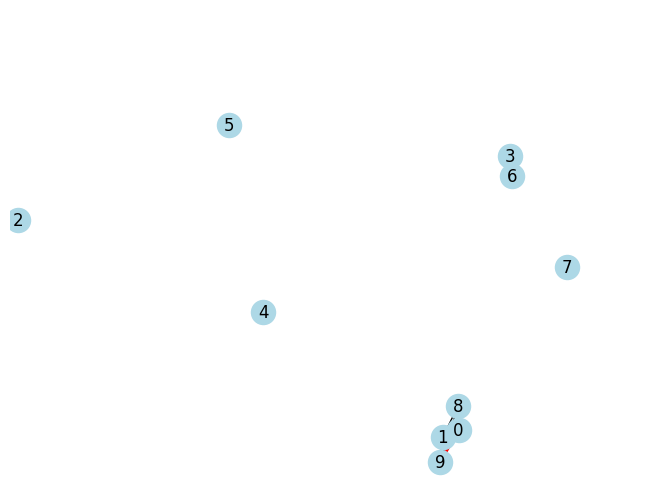

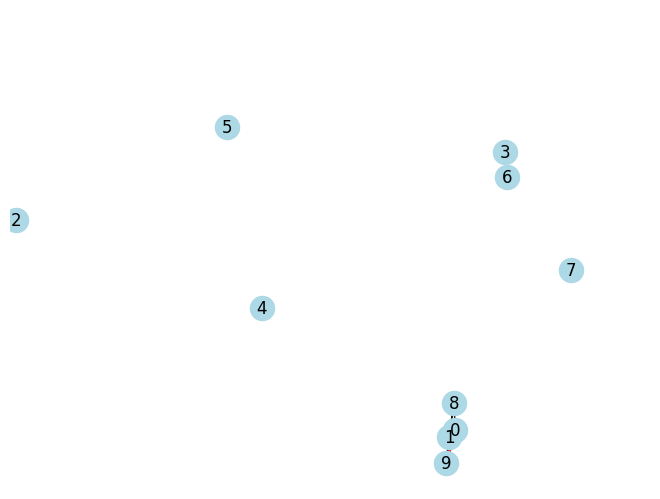

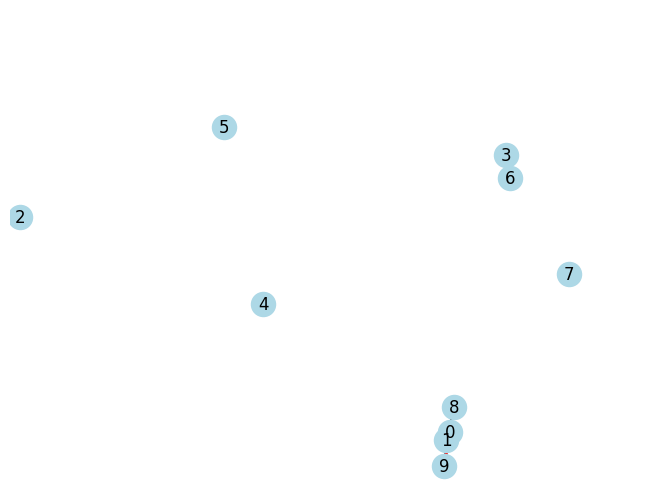

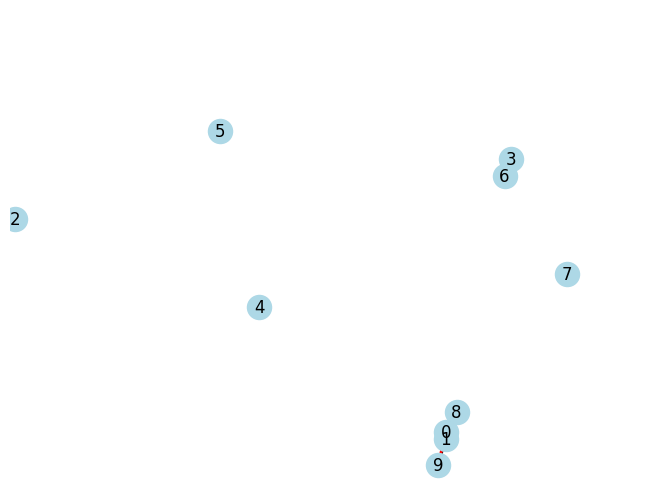

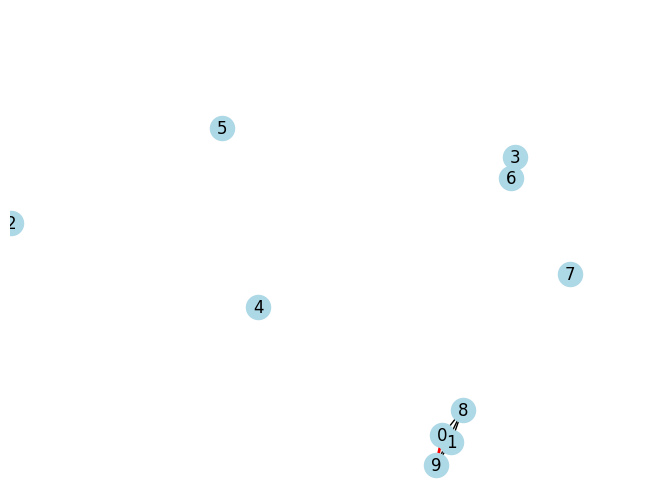

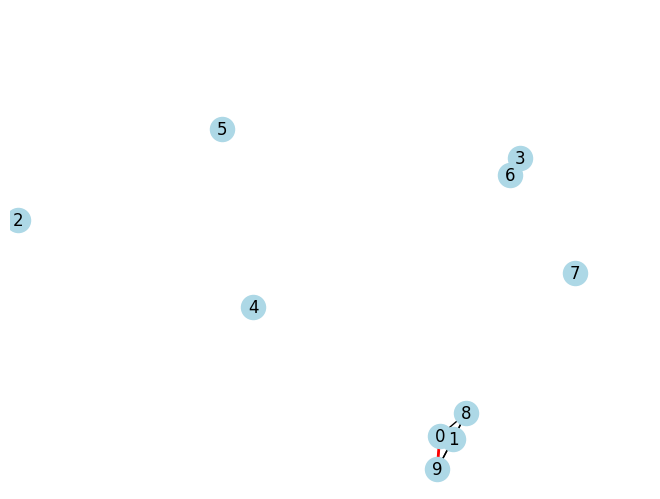

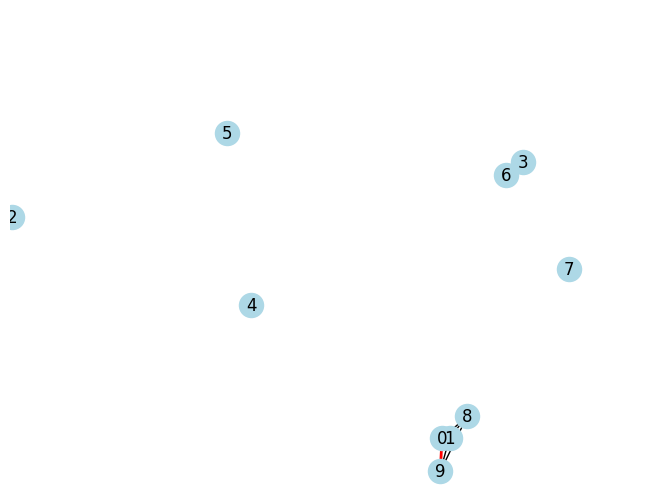

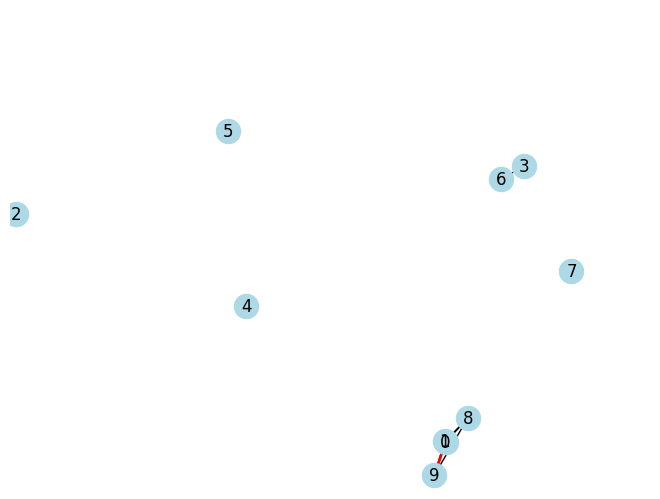

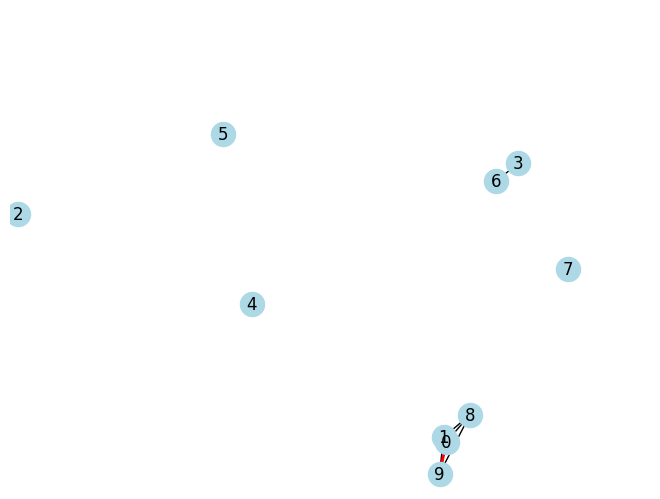

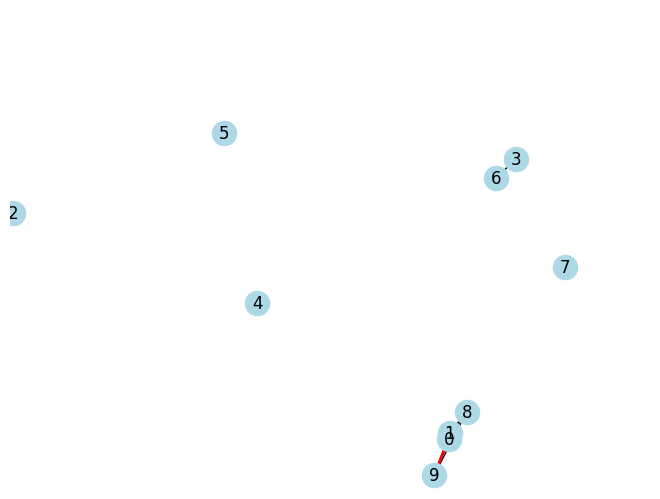

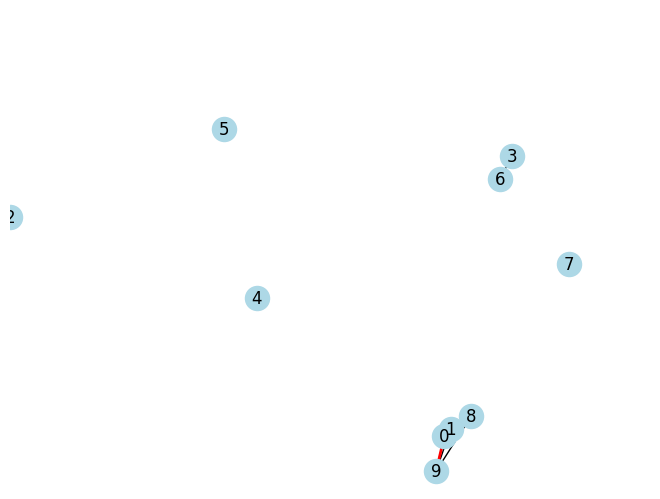

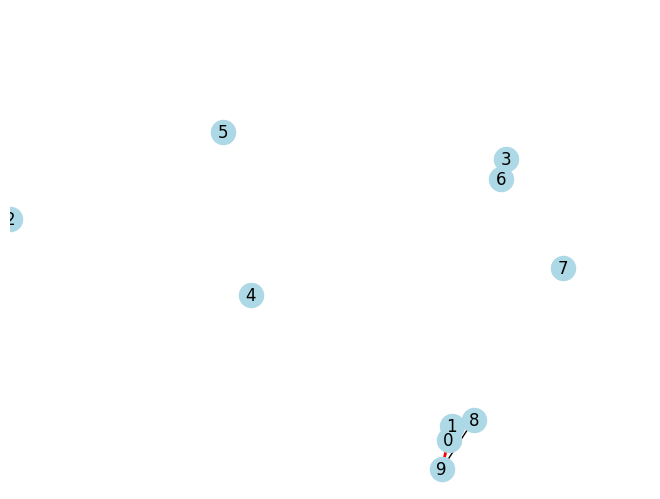

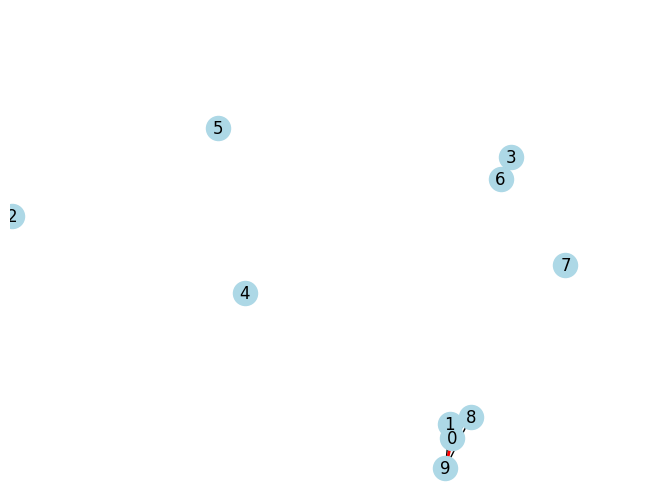

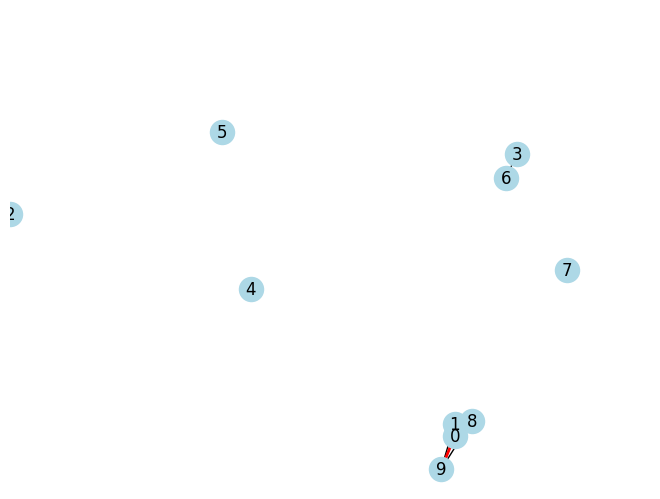

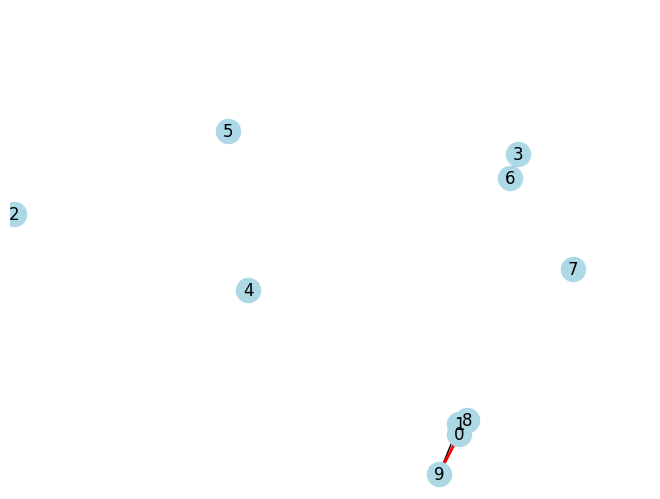

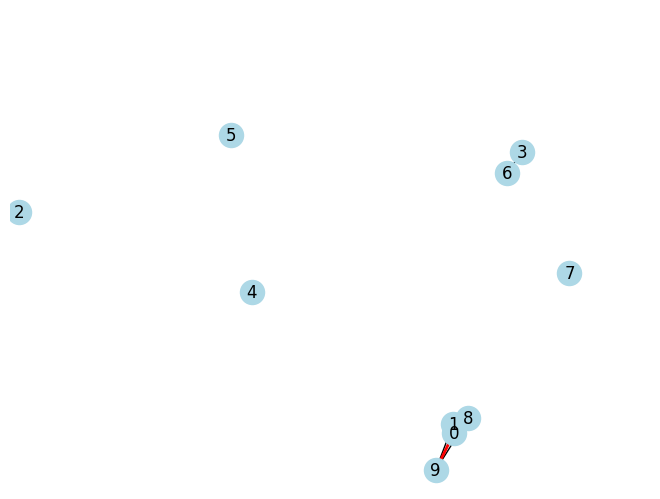

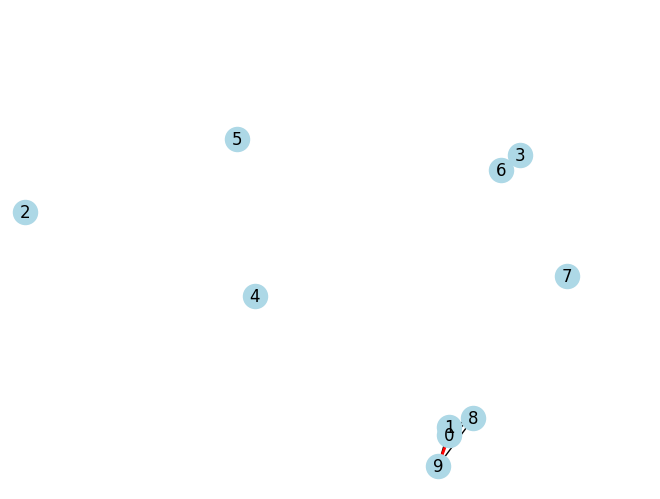

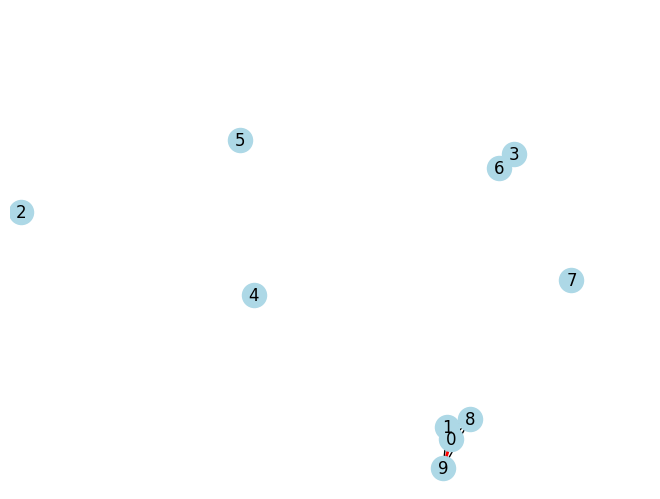

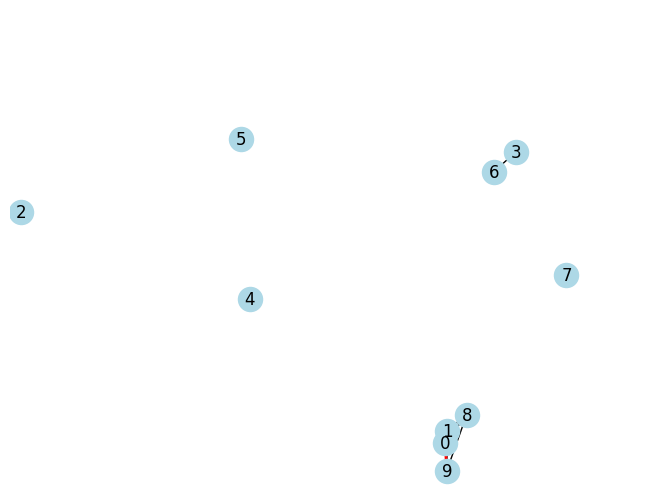

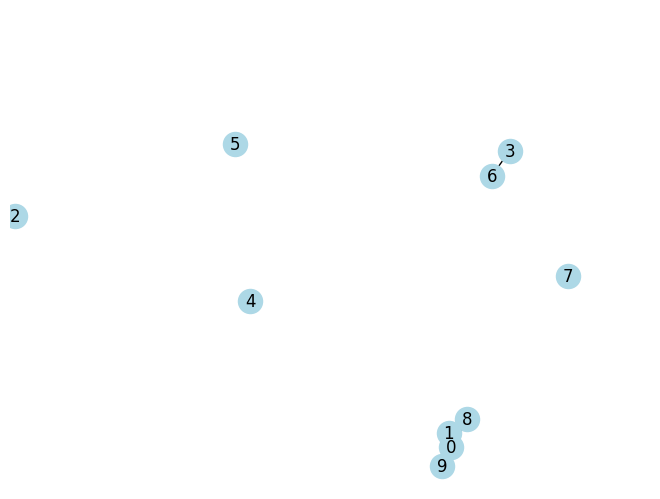

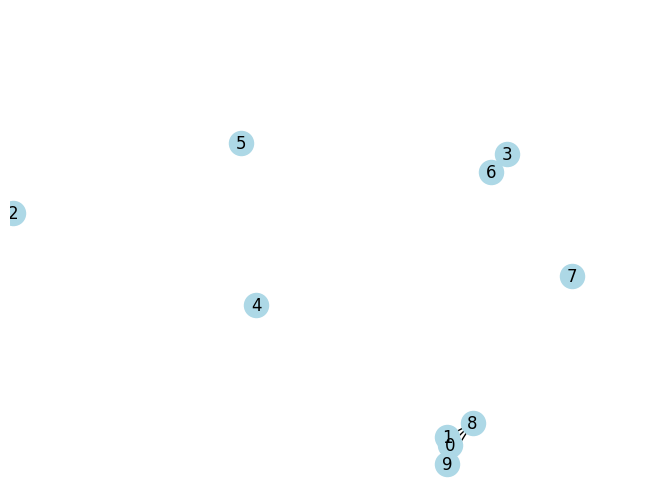

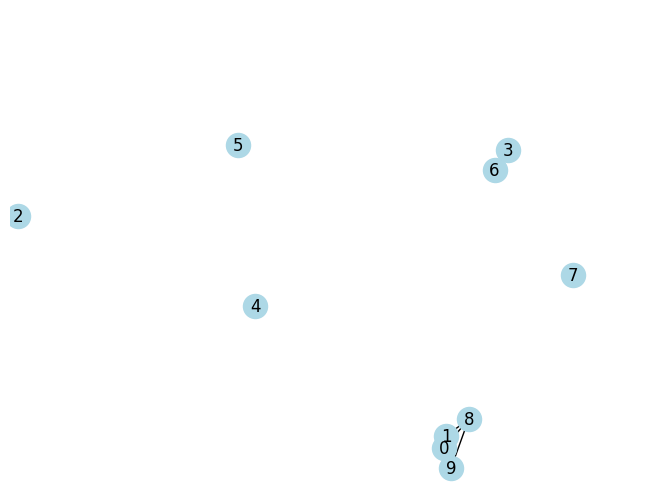

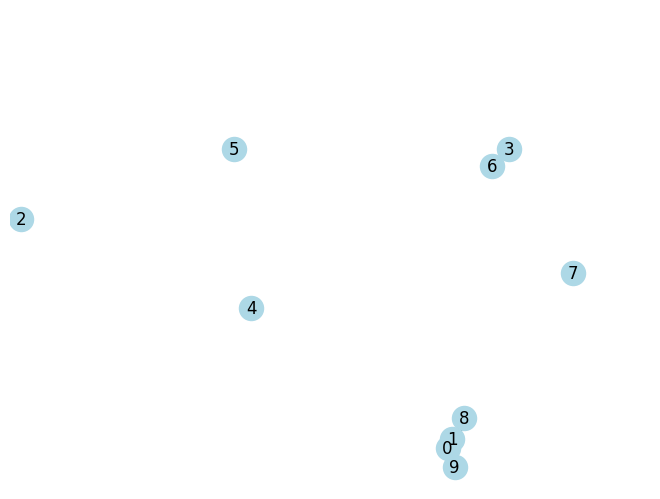

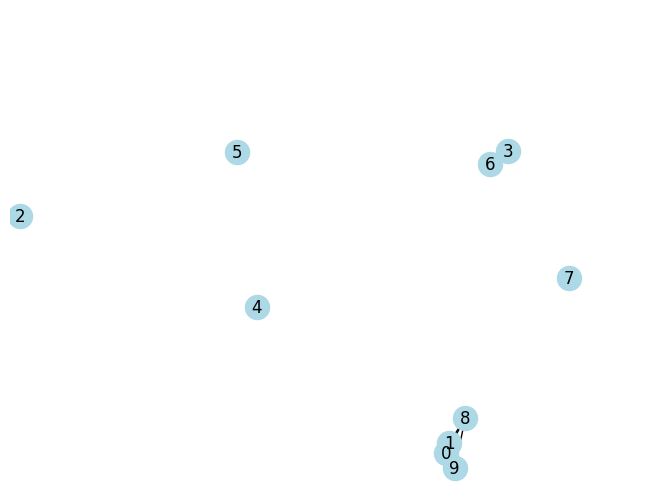

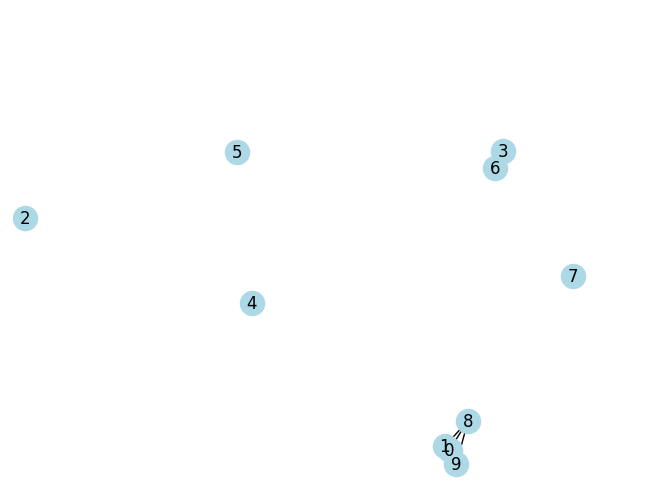

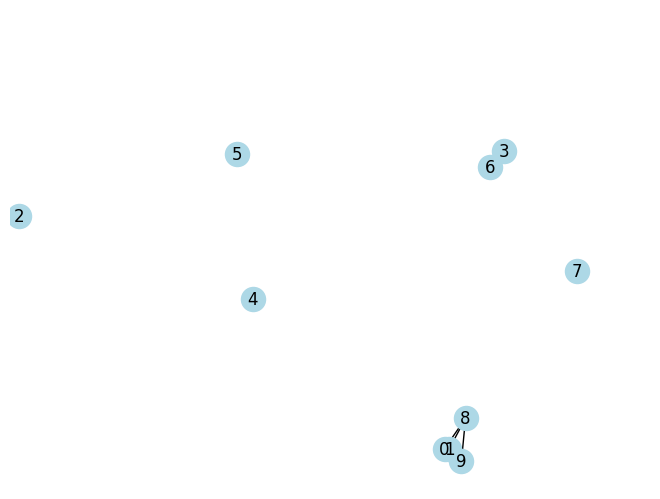

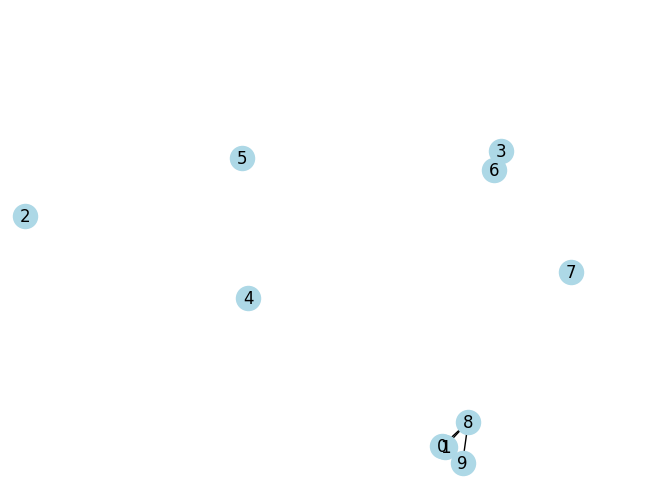

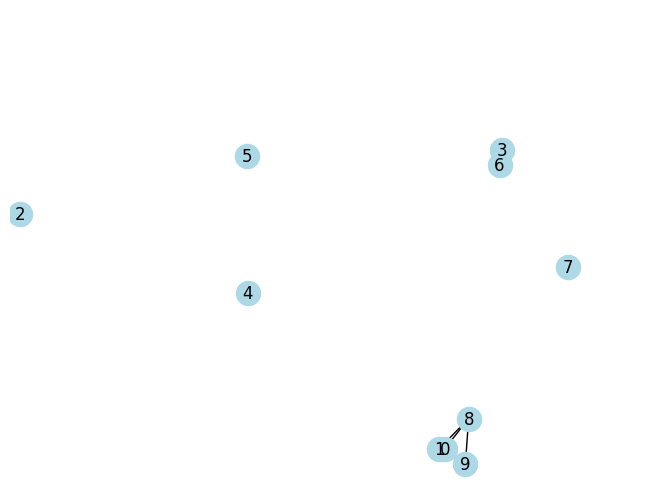

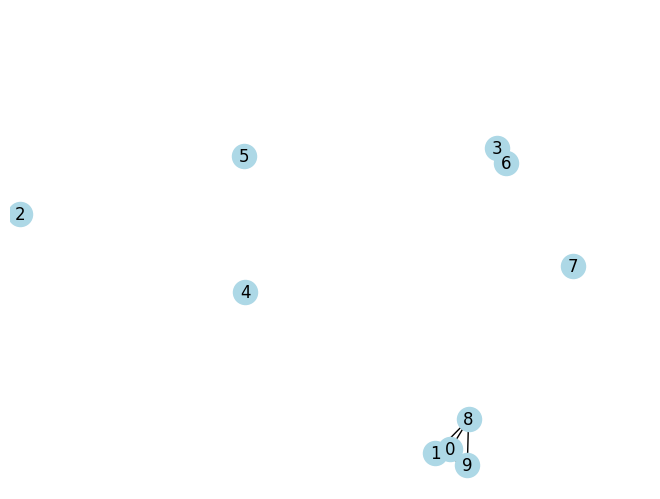

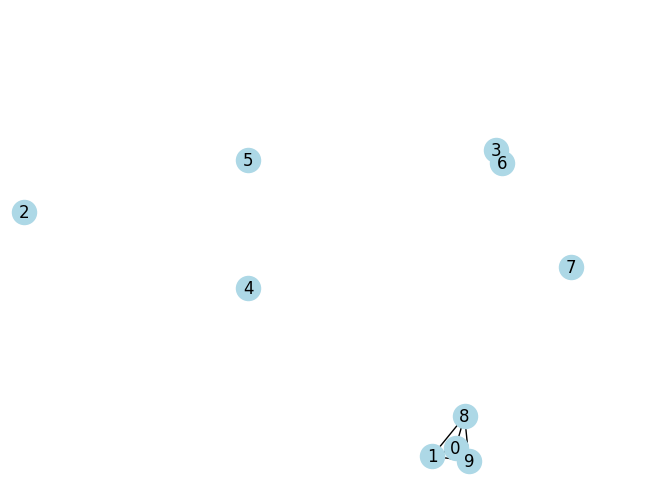

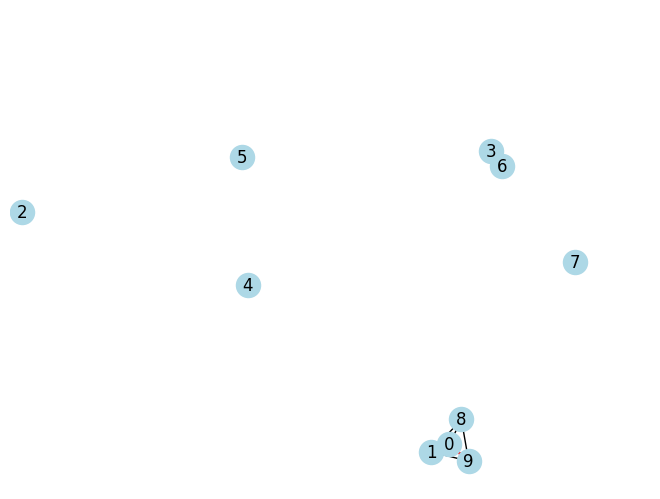

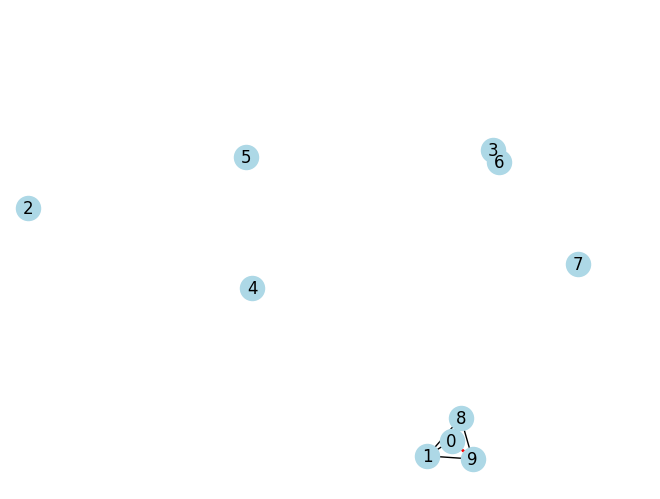

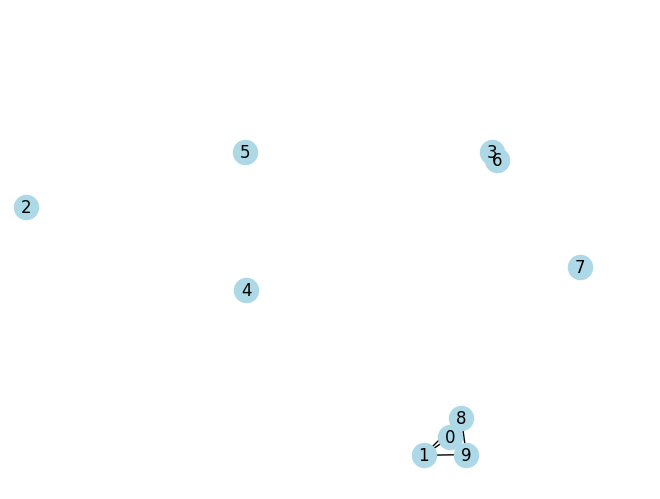

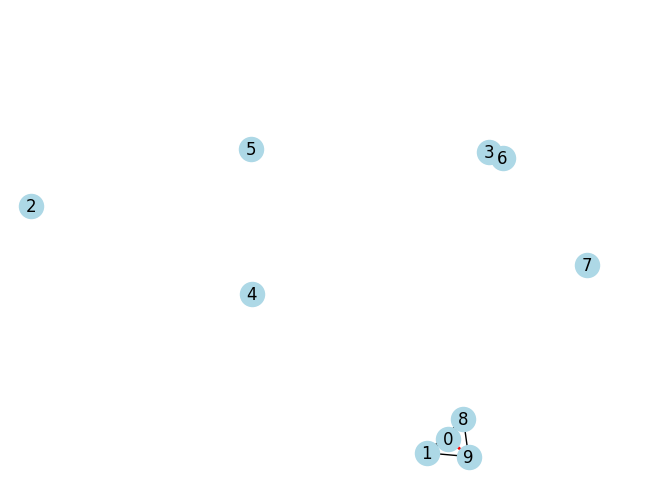

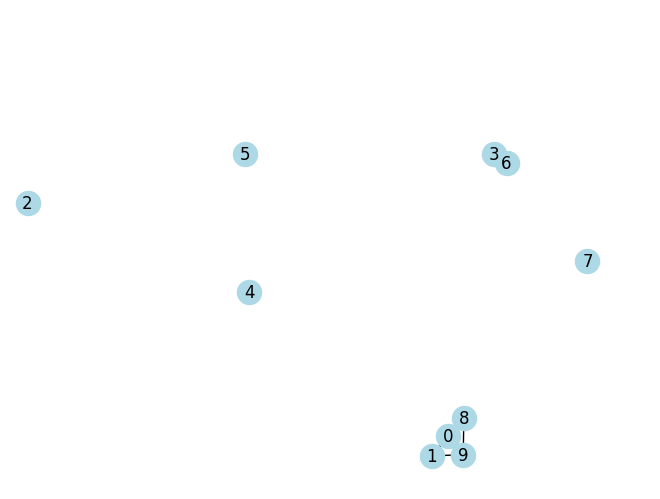

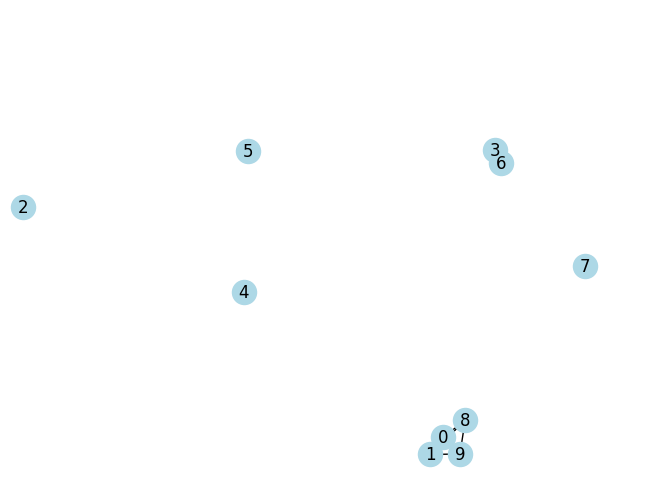

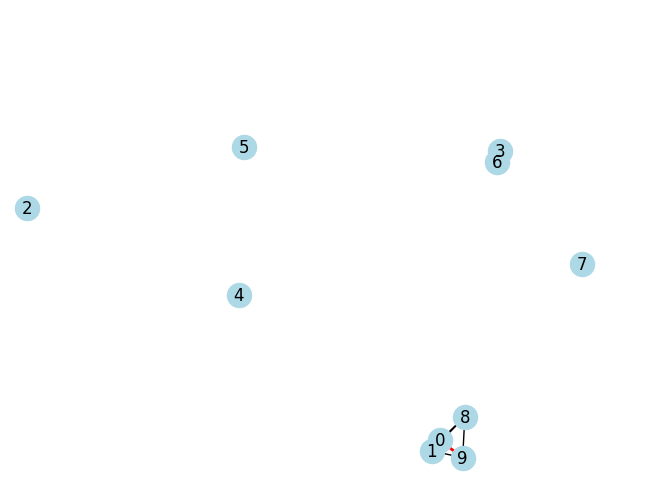

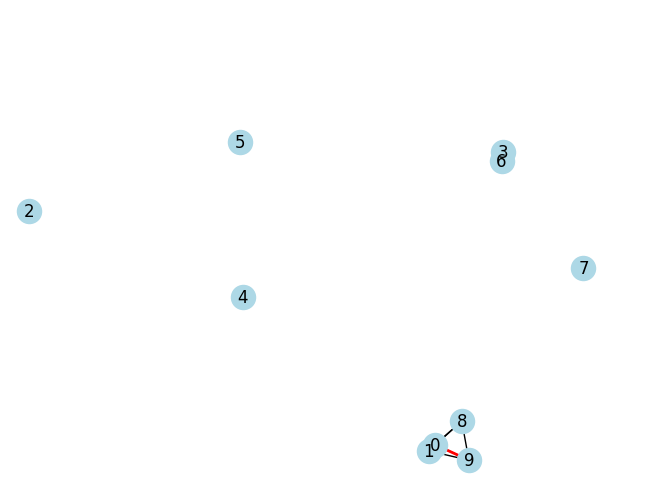

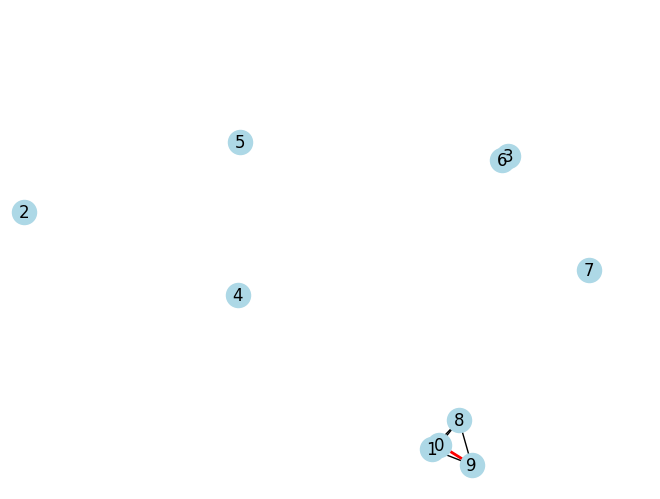

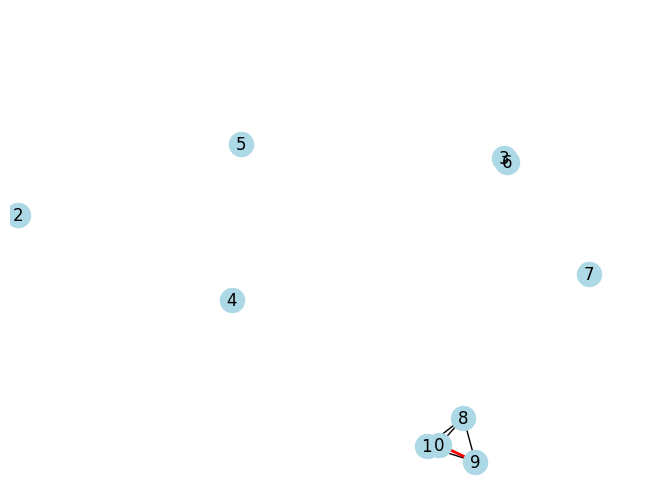

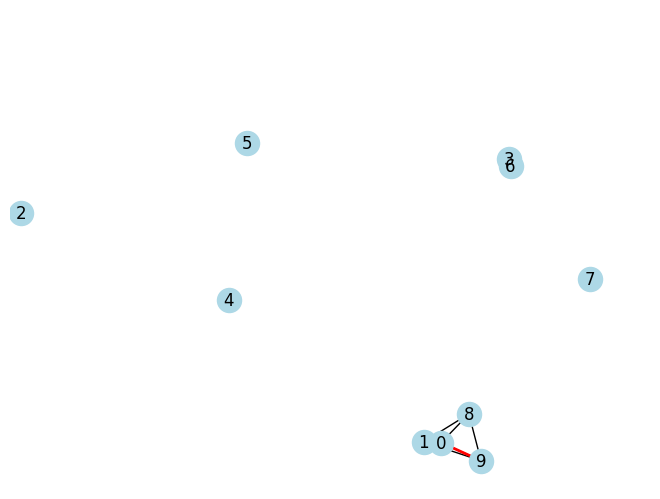

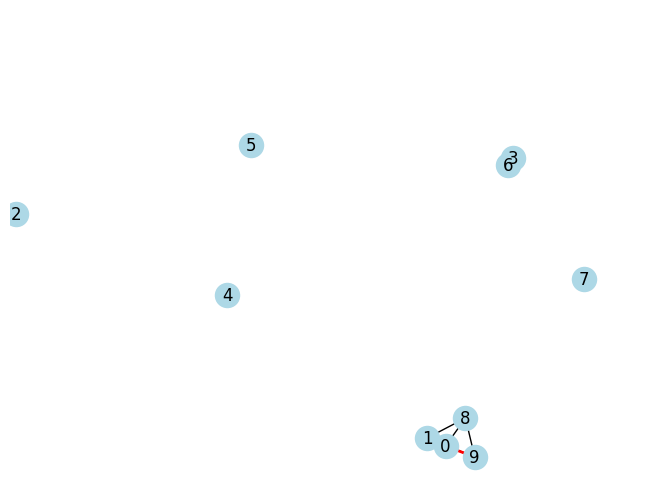

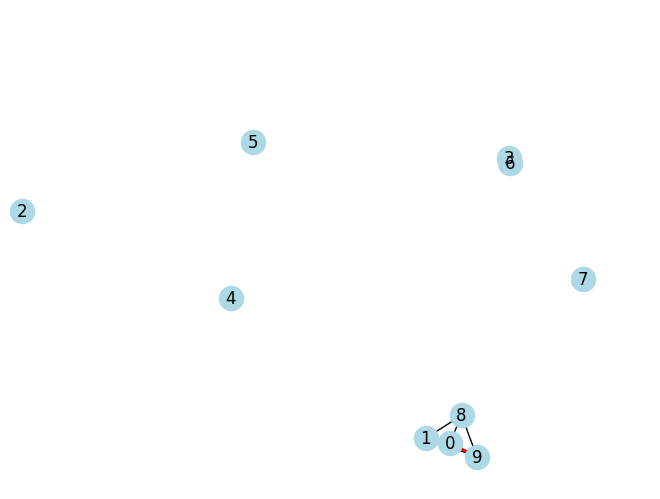

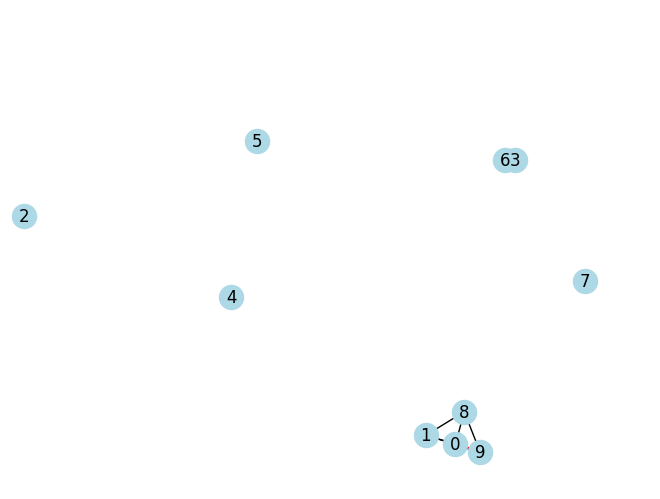

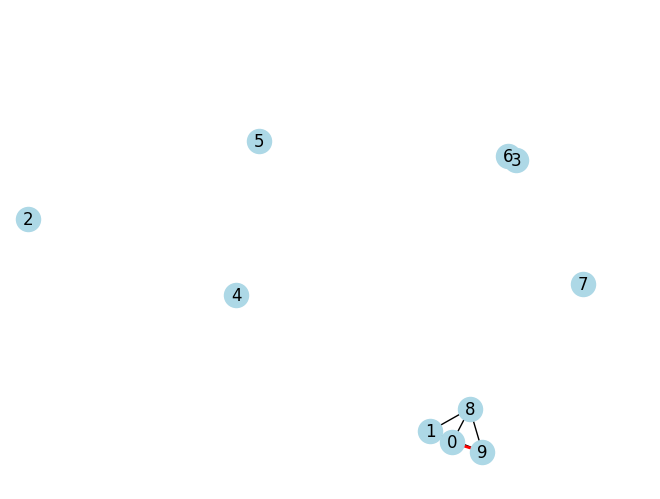

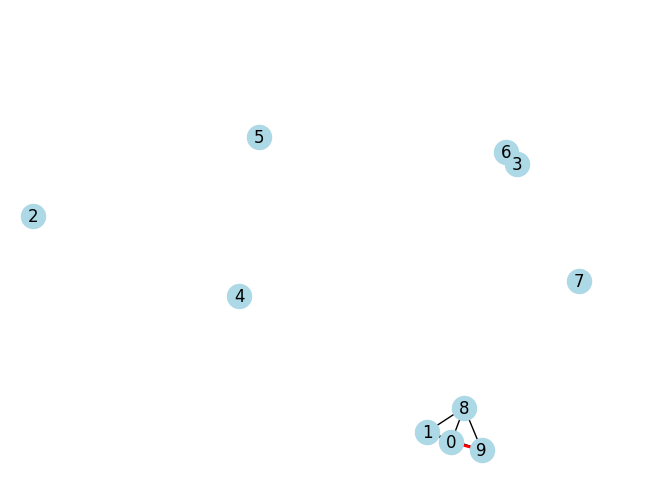

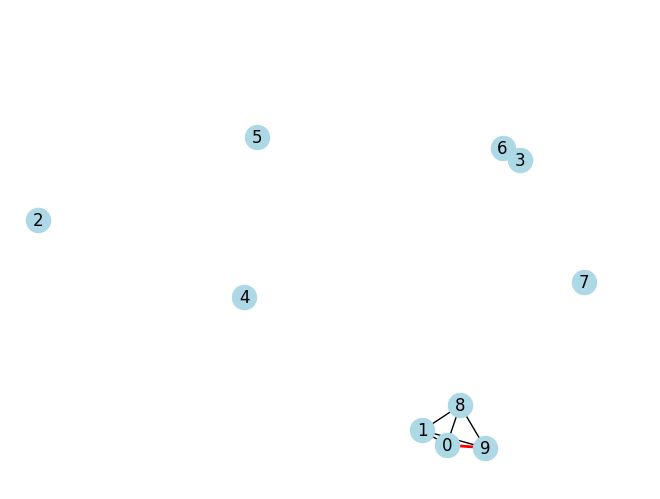

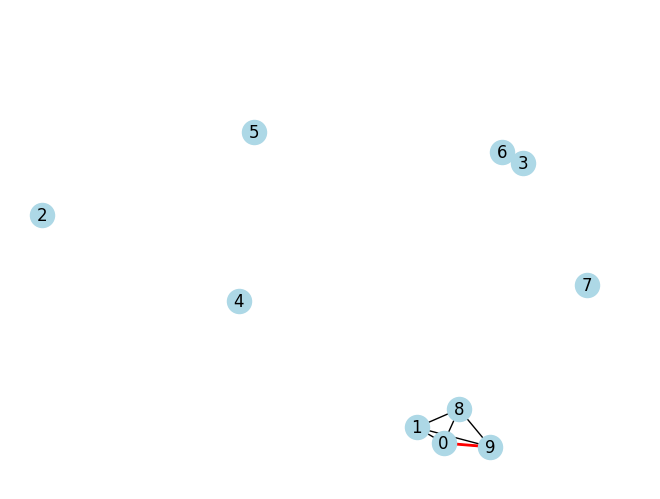

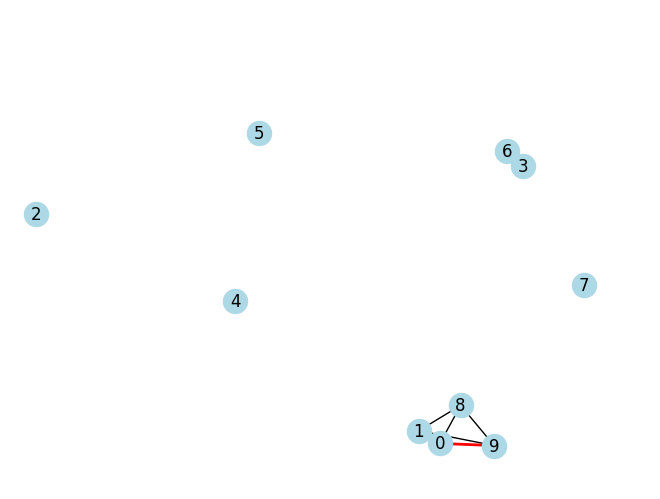

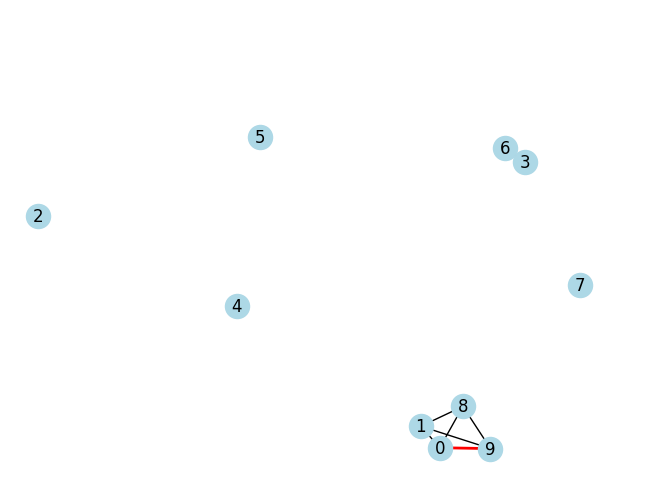

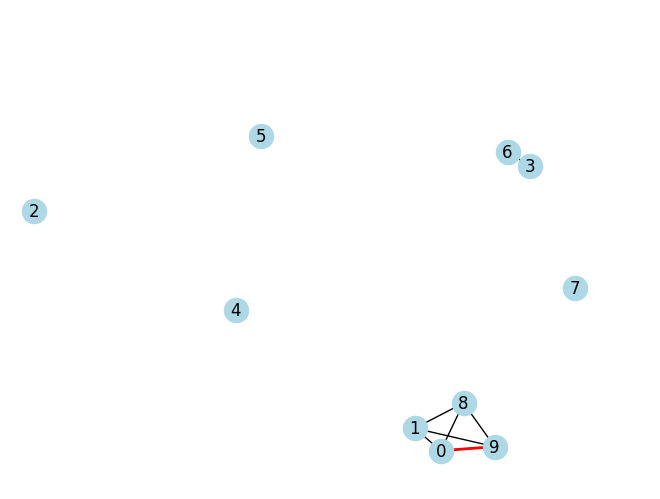

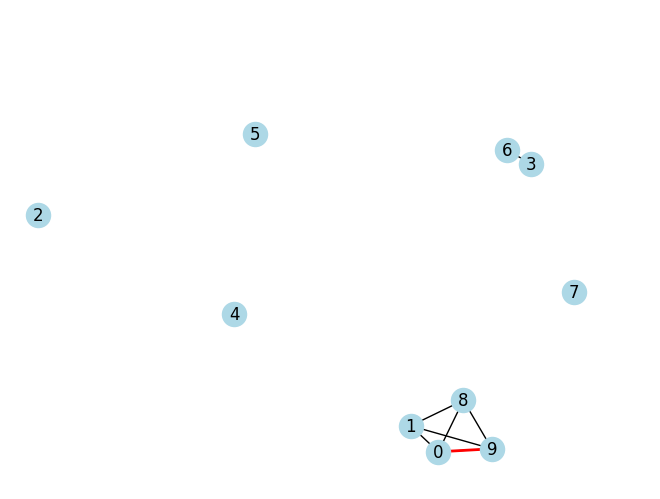

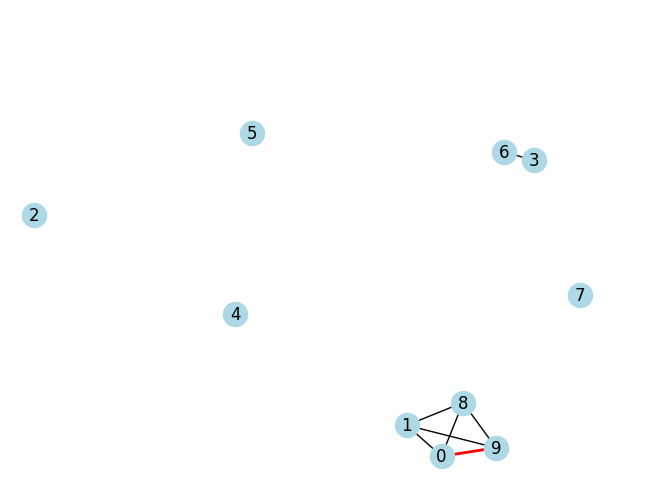

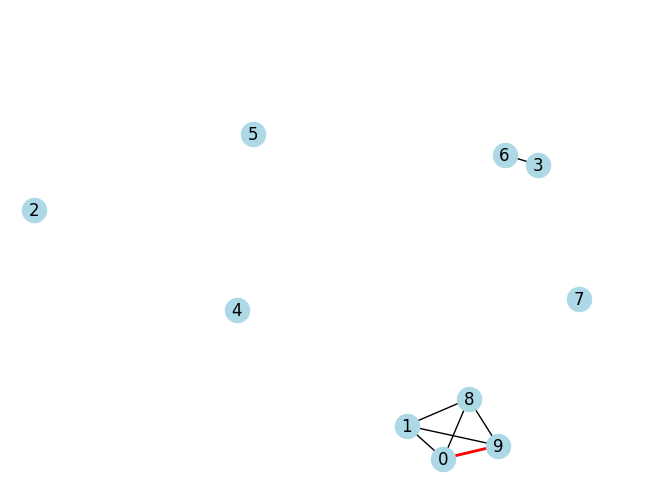

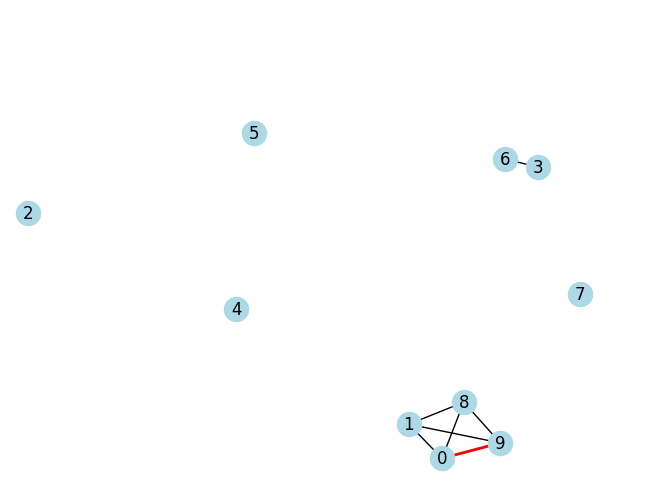

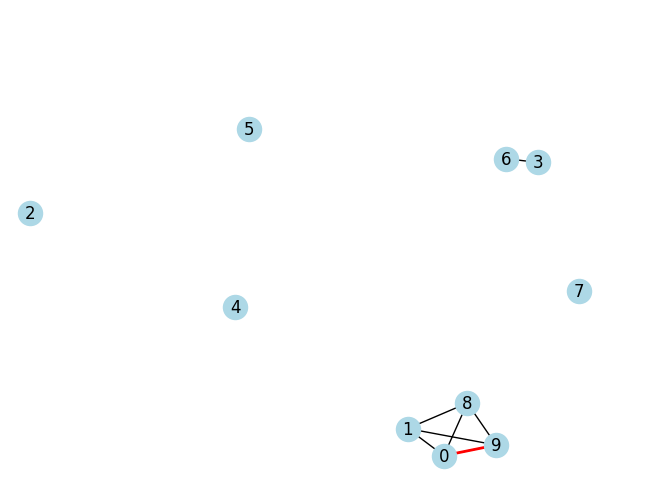

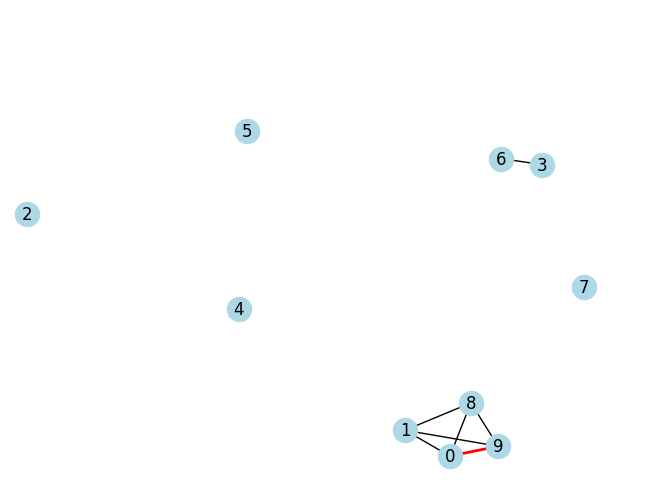

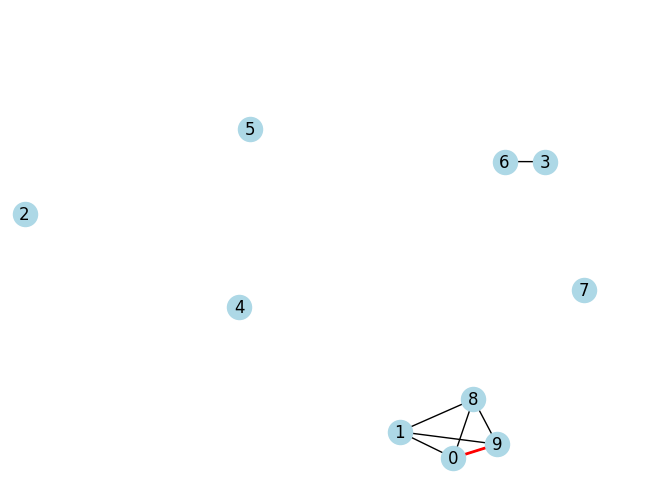

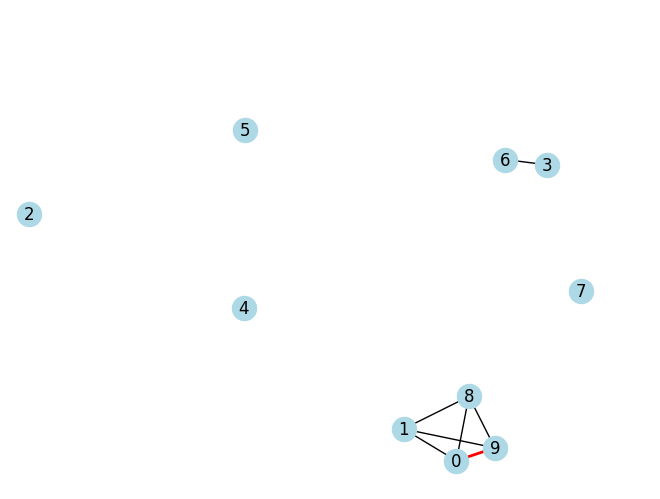

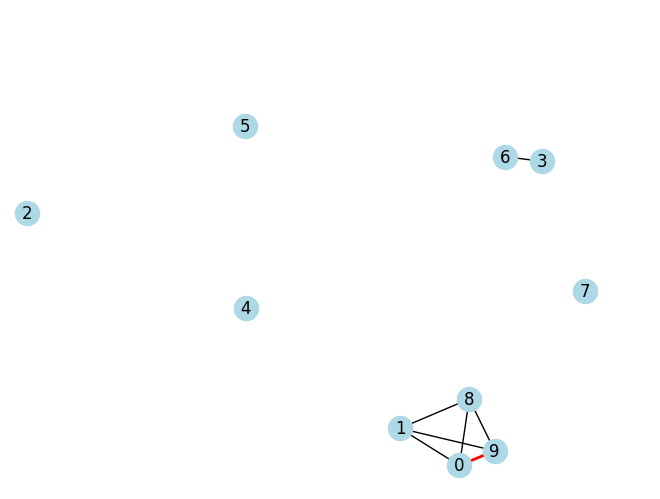

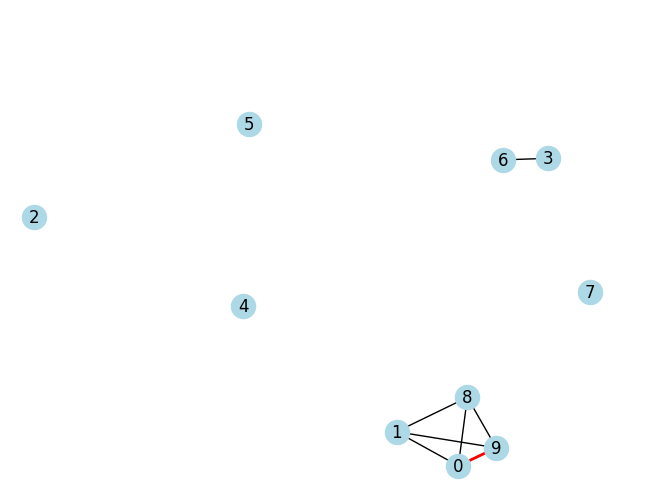

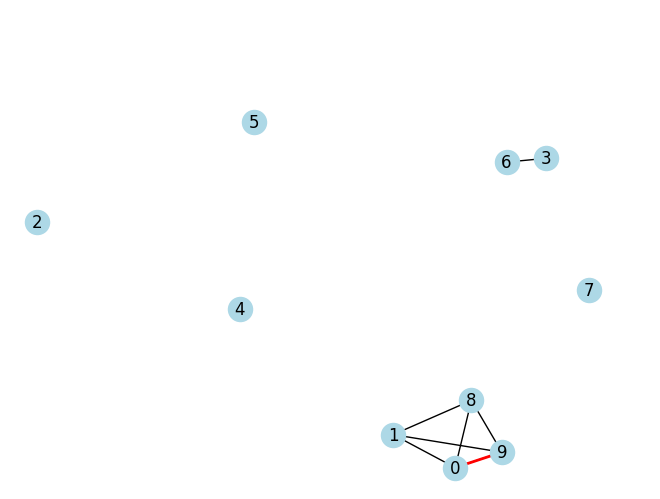

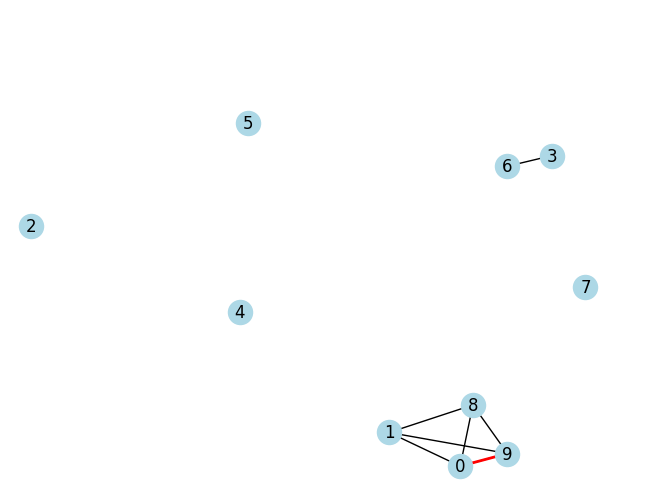

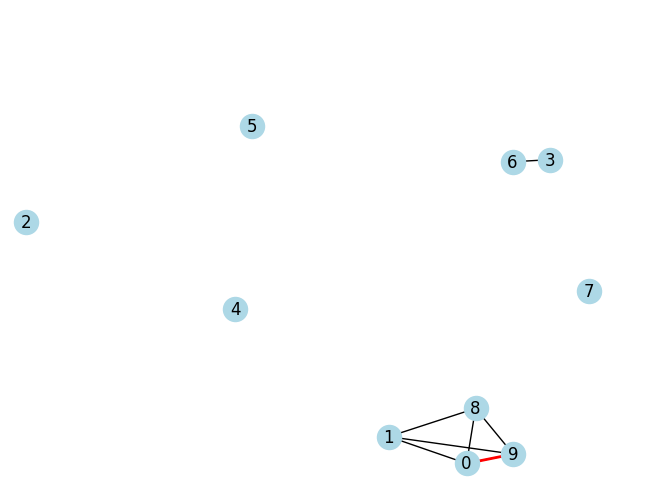

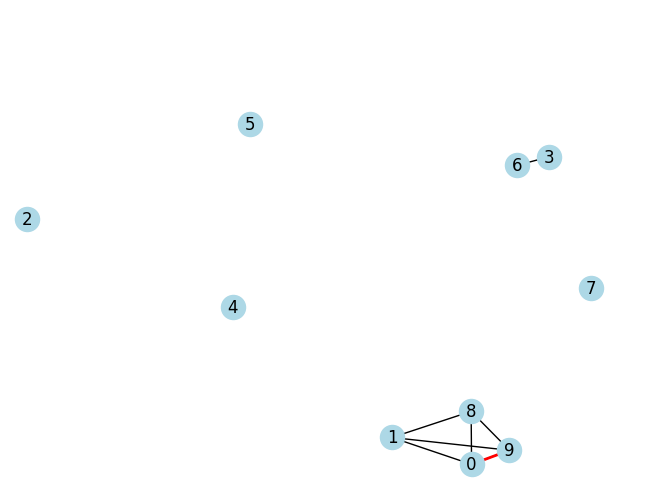

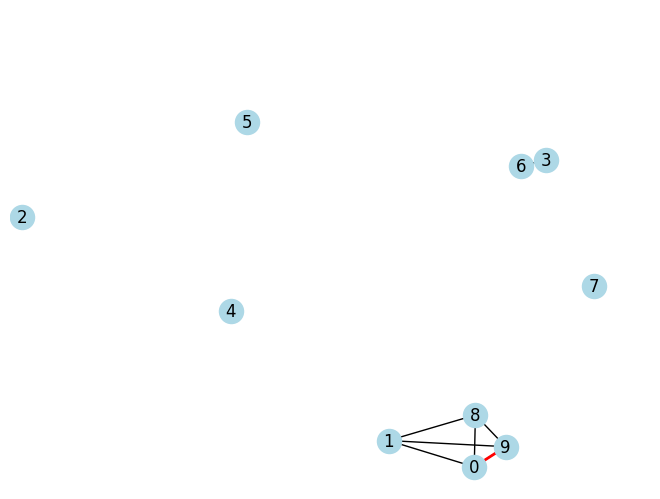

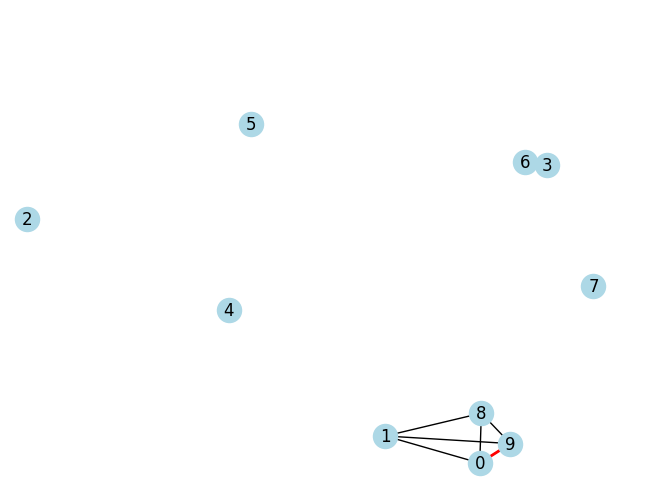

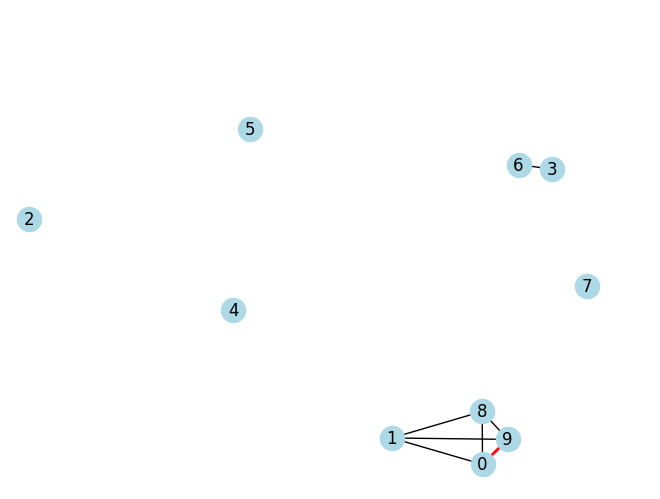

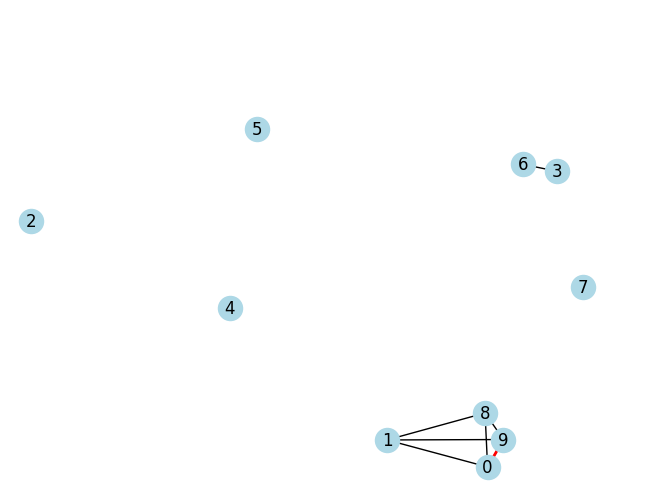

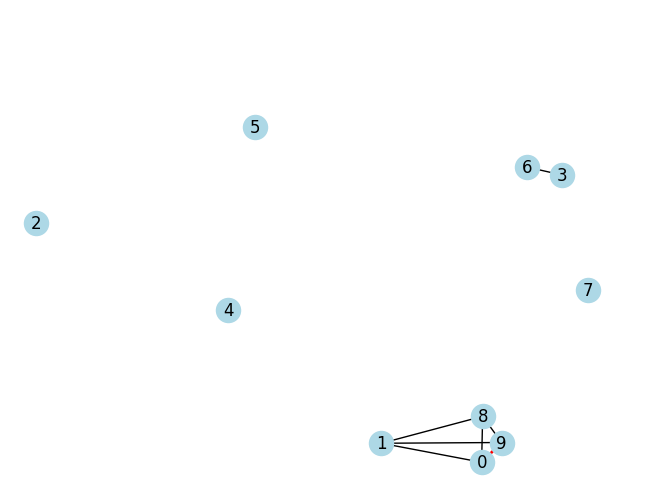

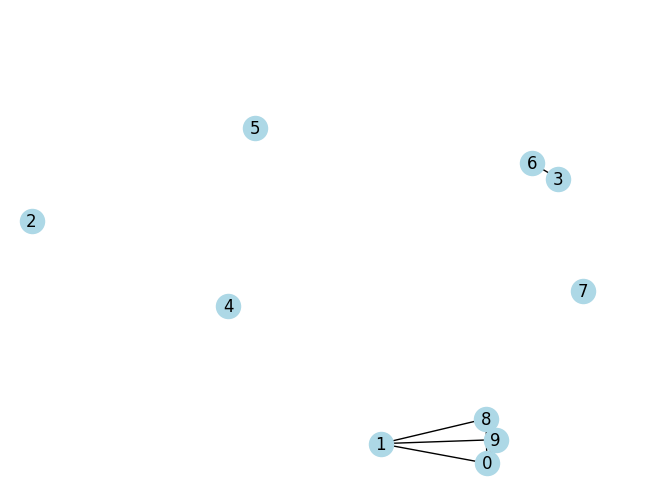

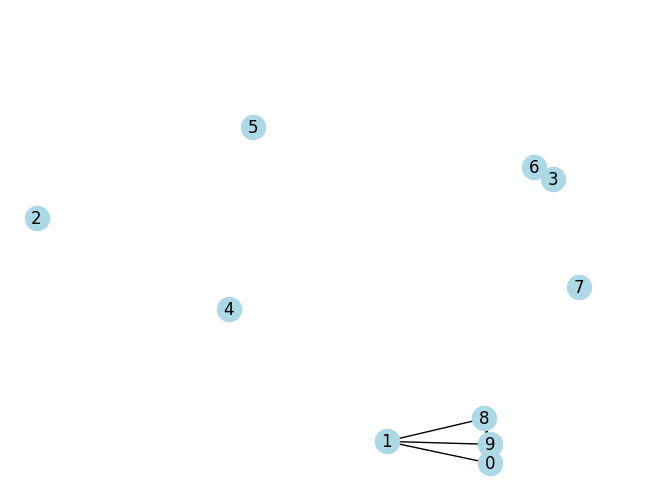

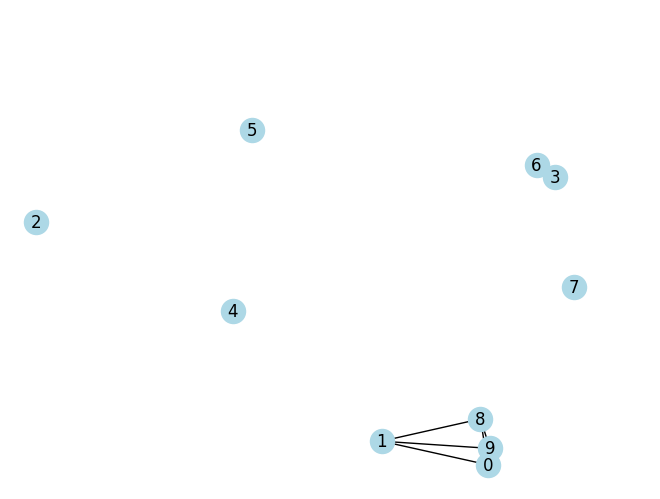

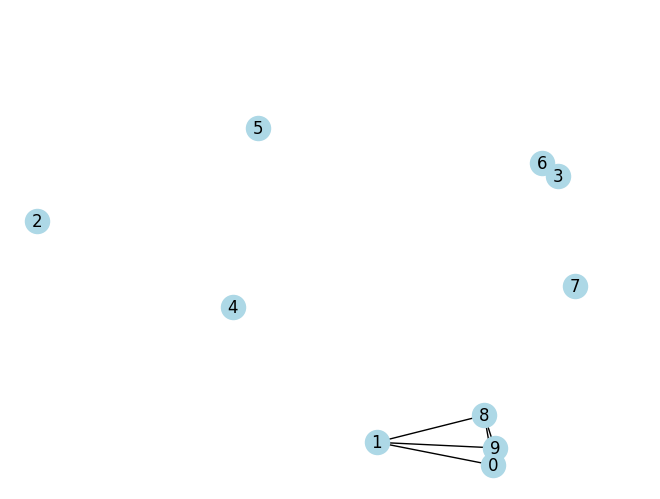

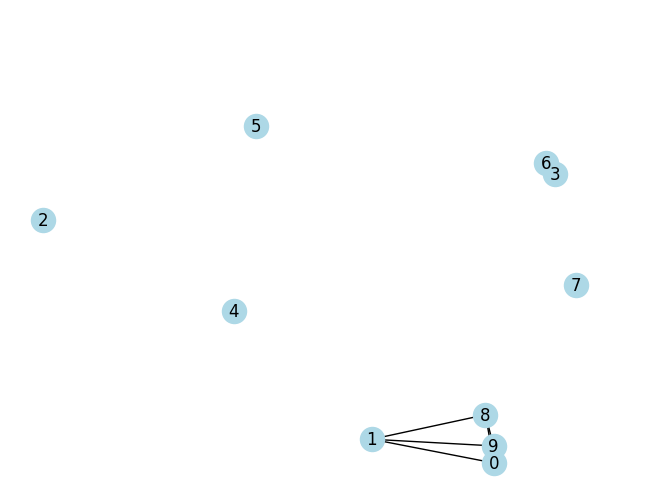

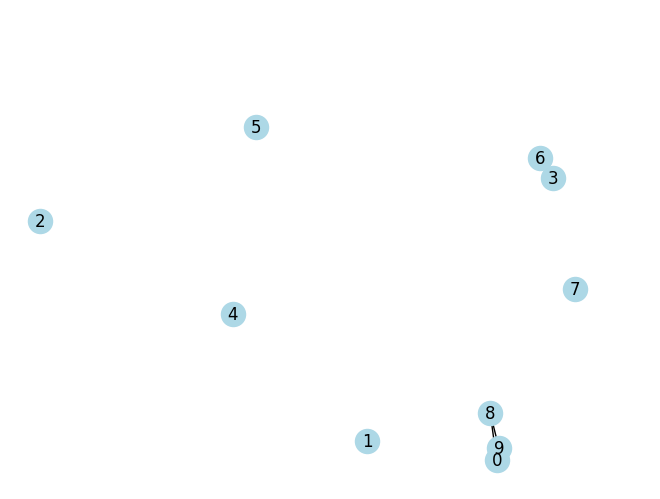

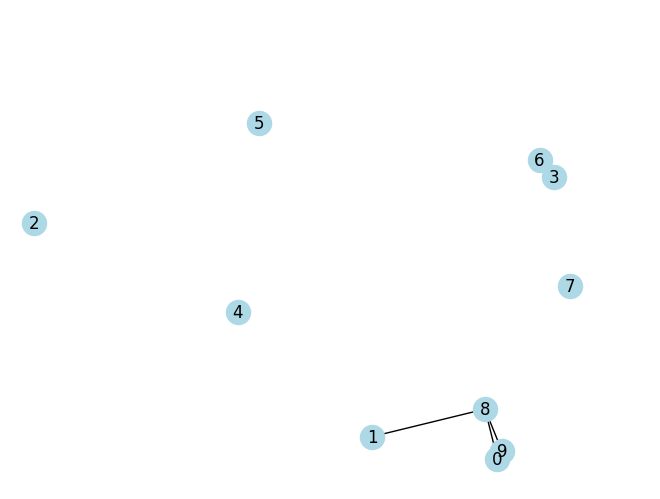

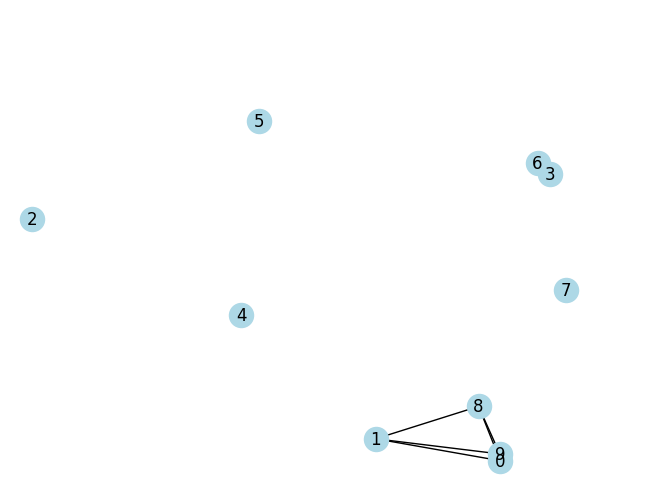

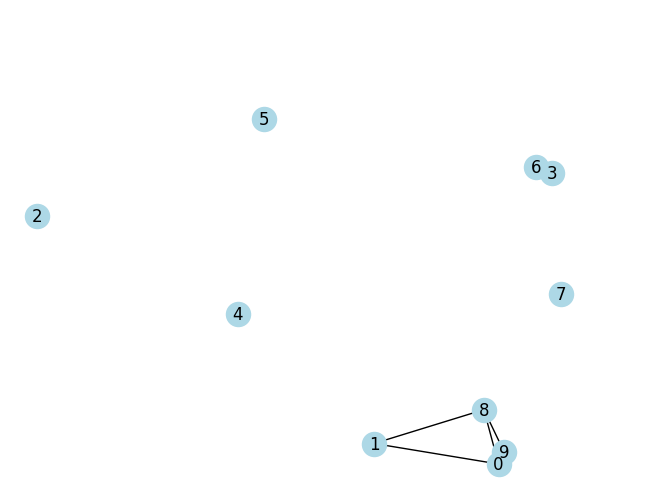

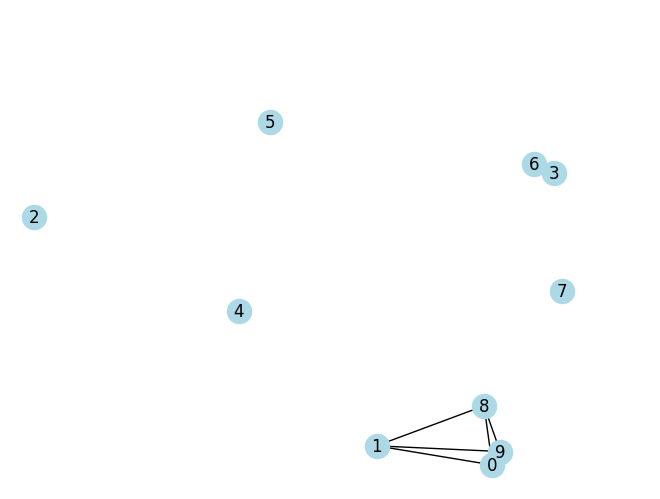

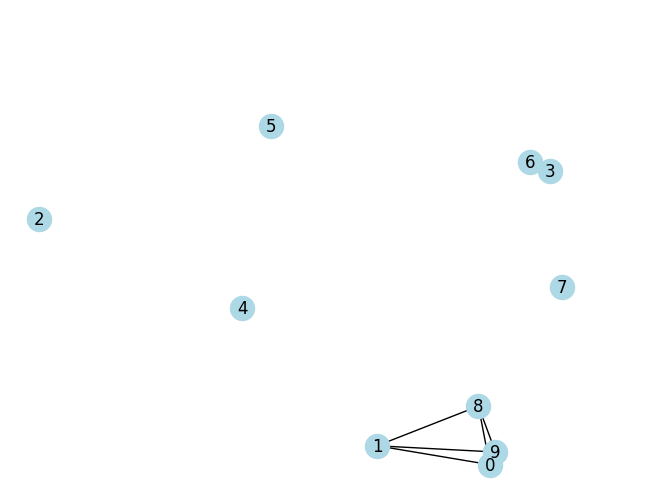

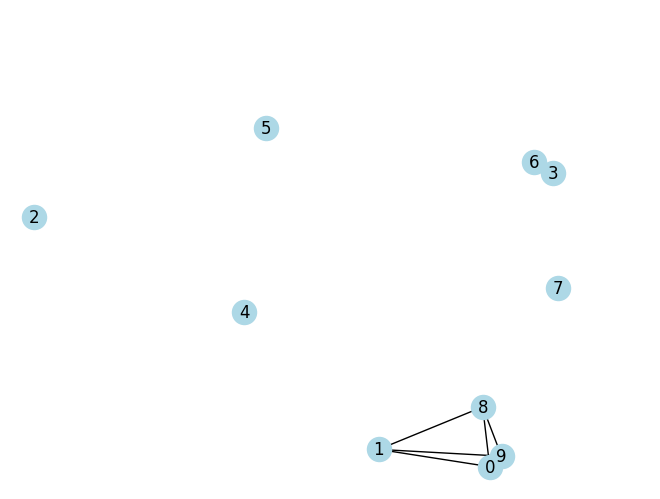

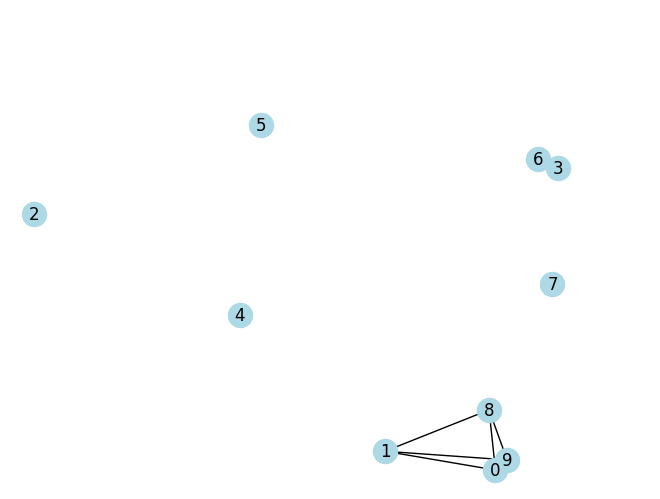

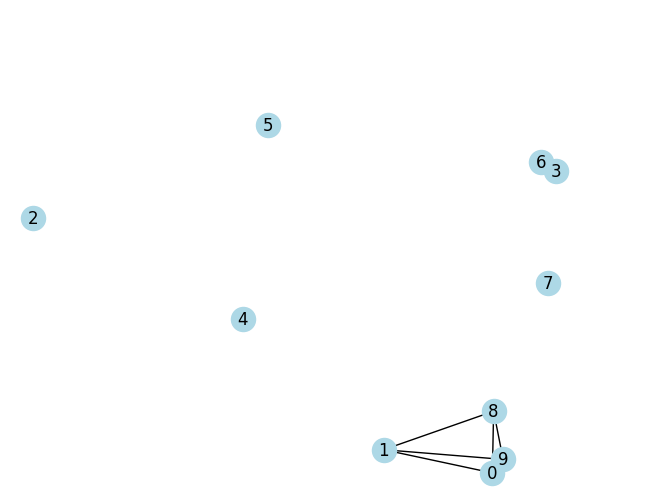

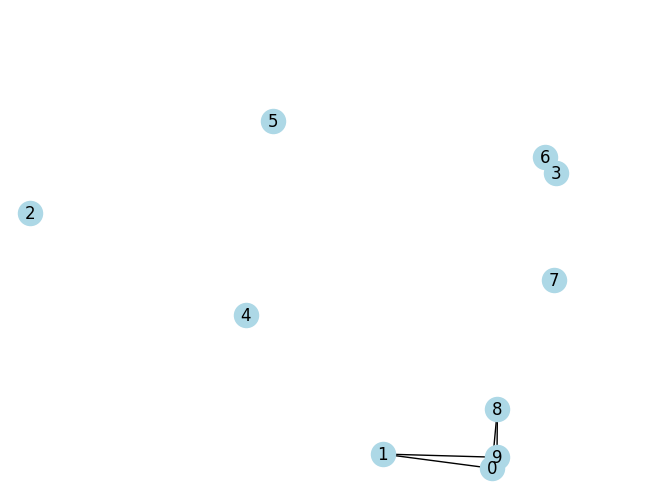

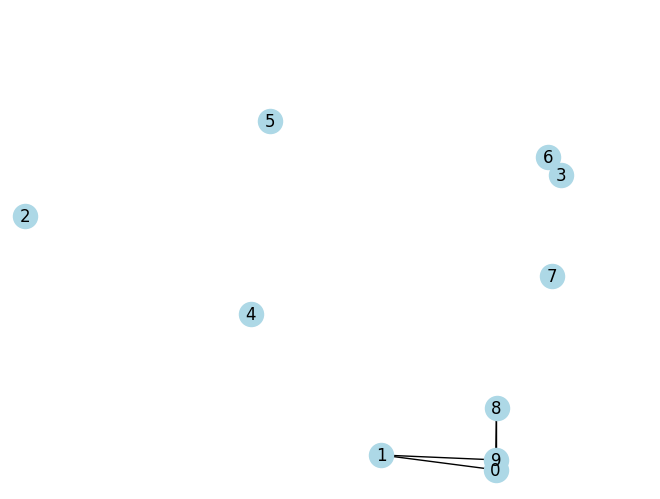

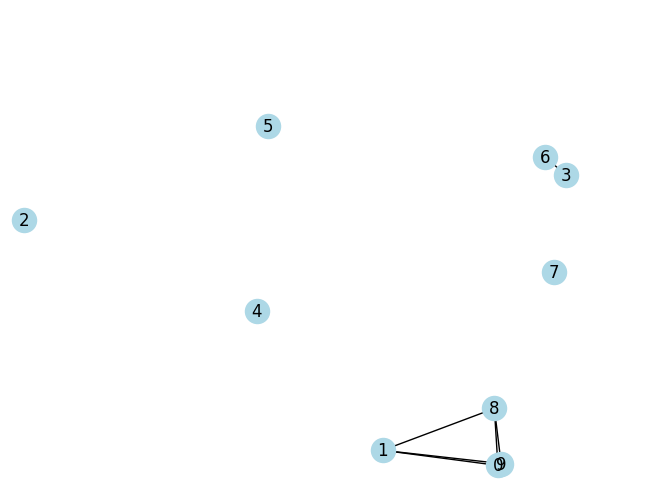

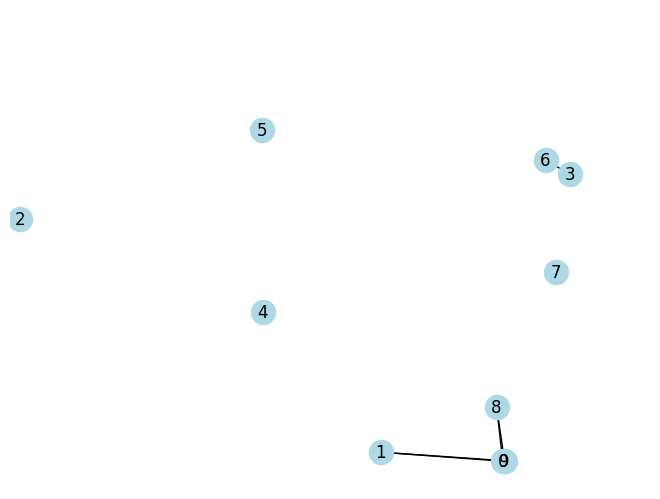

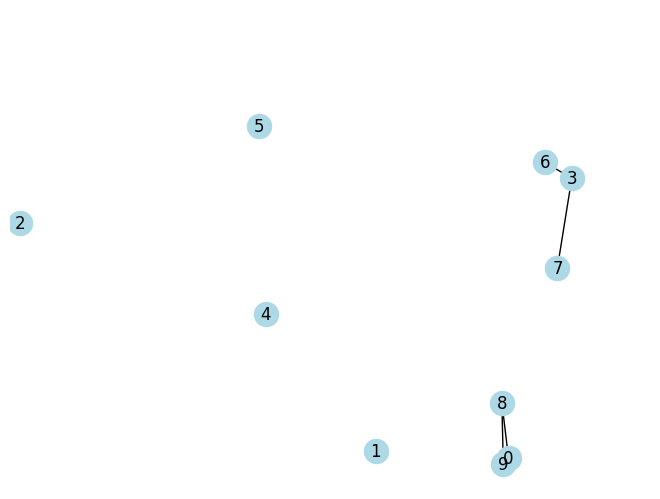

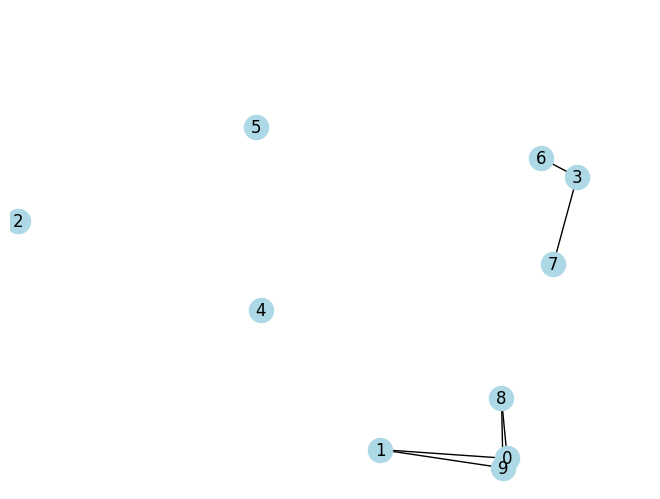

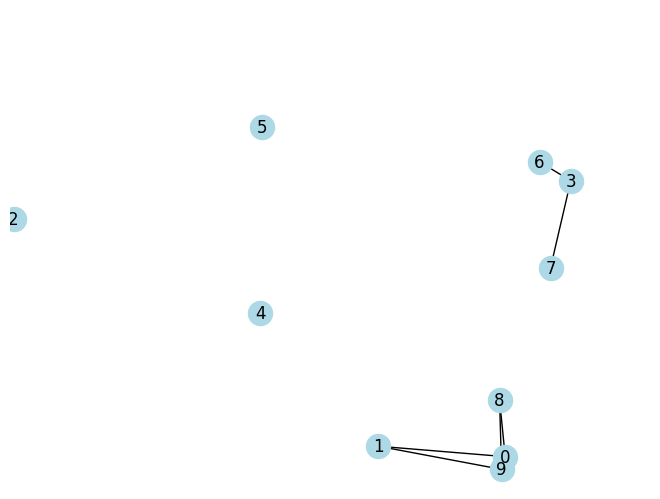

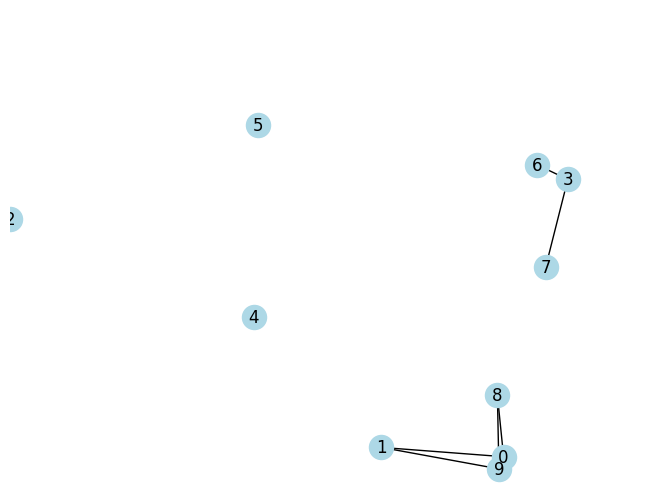

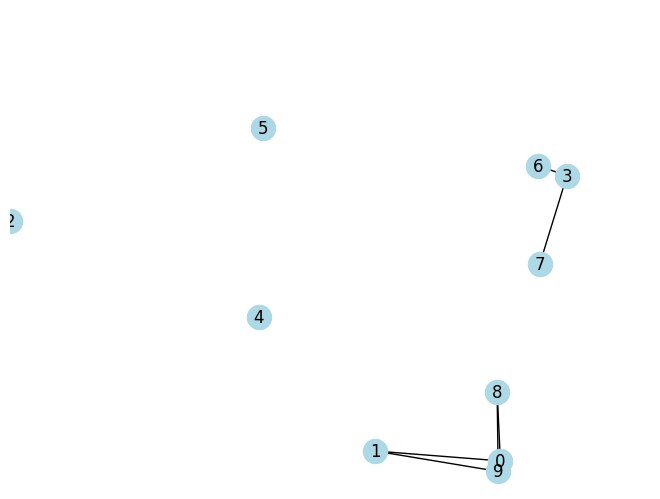

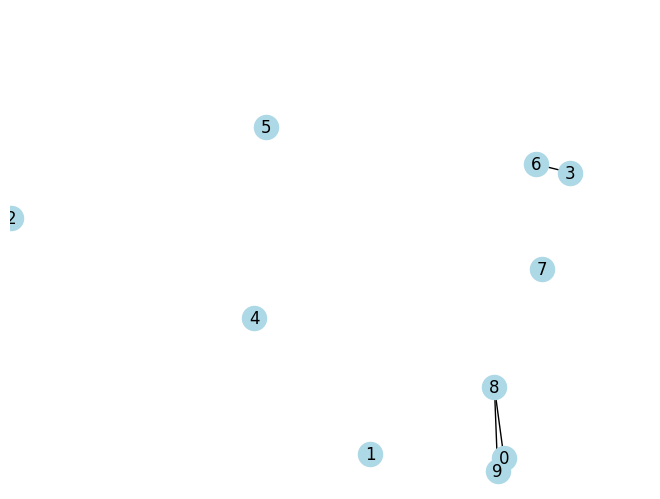

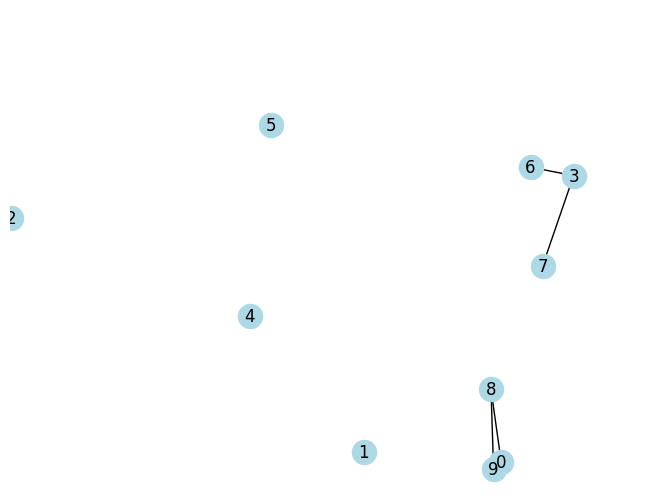

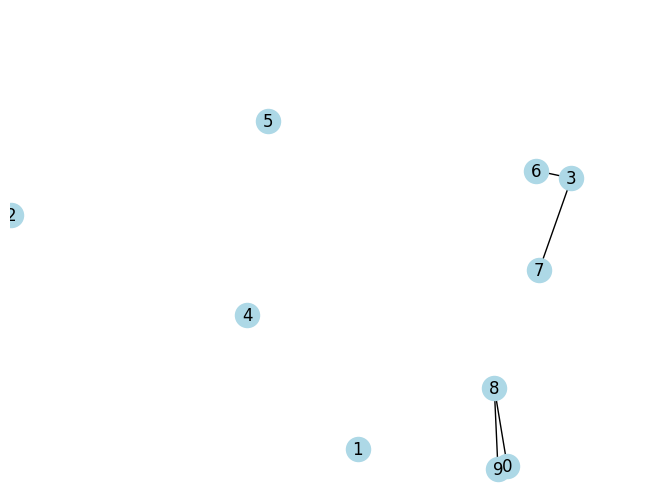

In [20]:
import matplotlib.pyplot as plt

def visualize_network(G, path=None):
    plt.clf()
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightblue')

    # Highlight the path
    if path:
        path_edges = list(zip(path[:-1], path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.xlim(0, AREA_SIZE)
    plt.ylim(0, AREA_SIZE)
    plt.pause(0.1)

# Example usage in simulation loop
for t in range(SIM_TIME):
    update_positions(G)
    update_edges(G)

    # Find a route
    source = 0
    destination = 9
    route = aodv_route_discovery(G, source, destination)

    # Visualize the network
    visualize_network(G, route)
    plt.pause(0.1)

plt.show()